In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
# Training Variables for Xicc:

training_variables_Xicc = ["LOG[Xicc_IPCHI2_OWNPV]", "COS^{-1}[Xicc_DIRA_OWNPV]", "LOG[Xicc_FDCHI2_OWNPV]", "Lc_ENDVERTEX_CHI2/NDOF", 
                      "Xicc_ENDVERTEX_CHI2/NDOF", "Xicc_MassFit_chi2/nDOF", 'Xicc_MIN_IPCHI2_OWNPV', 'Xicc_SUM_PT', 
                      'Xicc_MIN_PT', 'Lc_MIN_PT']
                      
# Defining the parameter kept uniform and the other parameters being trained:

uniform_variables  = ["Xicc_OWNPV_NDOF"]

In [3]:
# Specify the path of the directory
directory = '/home/bonacci/With_MVA'

# Use the listdir method from the os module to get a list of filenames in the directory
filenames = os.listdir(directory)

# Filter the list of filenames to include only those that end with .root
# and prepend the directory path to each filename
root_files = [os.path.join(directory, filename) for filename in filenames if filename.endswith('.root')]

# Print the list of .root filenames with full paths
print(root_files)
# Define the list of filenames


# Initialize a dictionary to hold the lists of files for each classifier
classifier_files = {}

# Iterate through each file in the list
for filename in root_files:
    # Extract the classifier name from the filename
    classifier_name = filename.split('_WithMVA_')[1].split('.root')[0]
    
    # If the classifier name is not in the dictionary, initialize it with an empty list
    if classifier_name not in classifier_files:
        classifier_files[classifier_name] = []
    
    # Append the current filename to the appropriate list in the dictionary
    classifier_files[classifier_name].append(filename)

# Now, classifier_files is a dictionary where the keys are classifier names and the values are lists of filenames

# Iterate through each classifier and its list of filenames
for classifier_name, filenames in classifier_files.items():
    # Modify each filename in the list by appending ':tree'
    classifier_files[classifier_name] = [filename + ':tree' for filename in filenames]

# Now, every filename in the lists has ':tree' appended to it


['/home/bonacci/With_MVA/280_Data_Xiccpp2LcpKmPipPip_2018_MagDown_WithMVA_NN_FL___PyTorch.root', '/home/bonacci/With_MVA/21_Data_Xiccpp2LcpKmPipPip_2018_MagDown_WithMVA_KNNFL___hep_ml.root', '/home/bonacci/With_MVA/211_Data_Xiccpp2LcpKmPipPip_2018_MagDown_WithMVA_NN_FL___PyTorch.root', '/home/bonacci/With_MVA/151_Data_Xiccpp2LcpKmPipPip_2018_MagDown_WithMVA_FL___hep_ml.root', '/home/bonacci/With_MVA/250_Data_Xiccpp2LcpKmPipPip_2018_MagUp_WithMVA_AdaBoost___sklearn.root', '/home/bonacci/With_MVA/113_Data_Xiccpp2LcpKmPipPip_2018_MagDown_WithMVA_KNNFL___hep_ml.root', '/home/bonacci/With_MVA/60_Data_Xiccpp2LcpKmPipPip_2018_MagUp_WithMVA_NN___PyTorch.root', '/home/bonacci/With_MVA/315_Data_Xiccpp2LcpKmPipPip_2018_MagUp_WithMVA_AdaBoost___sklearn.root', '/home/bonacci/With_MVA/108_Data_Xiccpp2LcpKmPipPip_2018_MagUp_WithMVA_KNNFL___hep_ml.root', '/home/bonacci/With_MVA/44_Data_Xiccpp2LcpKmPipPip_2018_MagDown_WithMVA_NN___PyTorch.root', '/home/bonacci/With_MVA/64_Data_Xiccpp2LcpKmPipPip_2018_M

To improve the mass resolution, the mass of the $\Xi_{cc}^{++}$ is corrected accordingly to: 

\begin{equation}
m\left(\Lambda_{\mathrm{c}}^{+} K^{-} \pi^{+} \pi^{+}\right) \equiv M\left(\Lambda_{\mathrm{c}}^{+} K^{-} \pi^{+} \pi^{+}\right)-M\left(\left[p K^{-} \pi^{+}\right]_{\Lambda_c^{+}}\right)+M_{\mathrm{PDG}}\left(\Lambda_{\mathrm{c}}^{+}\right),
\end{equation}

where $m\left(\Lambda_{\mathrm{c}}^{+} K^{-} \pi^{+} \pi^{+}\right)$ is the measure invariant mass of the $\Xi_{\mathrm{cc}}^{++}$ which is corrected by calculating the energy release, $M\left(\Lambda_{\mathrm{c}}^{+} K^{-} \pi^{+} \pi^{+}\right)-M\left(\left[p K^{-} \pi^{+}\right]_{\Lambda_c^{+}}\right)$; which is the $\Xi_{\mathrm{cc}}^{++}$ mass subtracted from the $\Lambda_{c}^{+}$ mass from the selected candidates. This can be seen below in the histogram figures. We then can add back $M_{\mathrm{PDG}}\left(\Lambda_{\mathrm{c}}^{+}\right)$, which is the very known value of the $\Lambda_{c}^{+}$ baryon.

In [4]:
# # Dictionary of Xicc data:
# Xicc_data = uproot.concatenate(classifier_files['NN___PyTorch'], library='np')

# # DataFrame of Xicc data:
# Xicc_df = pd.DataFrame.from_dict(Xicc_data)

# # Calculation of Energy Release term:
# Xicc_df['Energy_release'] = Xicc_df['Xicc_M'] - Xicc_df['Lc_M']

In [5]:
# Dictionary of Xicc data:
Xicc_data = uproot.concatenate(classifier_files['AdaBoost___sklearn'], library='np')

# DataFrame of Xicc data:
Xicc_df = pd.DataFrame.from_dict(Xicc_data)

# Calculation of Energy Release term:
Xicc_df['Energy_release'] = Xicc_df['Xicc_M'] - Xicc_df['Lc_M']

In [6]:
len(Xicc_df)

27849

In [7]:
# Get Lc prompt data:

import os

input_dir = "/home/shared/XiccMultiplicity/Xicc2LcKPiPi/Data/Stripping"

# List all the files in the input directory
files_in_dir = [os.path.join(input_dir, file) for file in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, file))]

# Filter out undesired files
filtered_files = [file for file in files_in_dir if "_0_" not in file and "_1_" not in file and "_2_" not in file and 
                  "Background_Xicc.root" not in file and 
                  "files_MagDown.txt" not in file and 
                  "files_MagUp.txt" not in file]

# Append ':Lcp2pKPi/DecayTree' to each file path
filenames = [file + ":Lcp2pKPi/DecayTree" for file in filtered_files]




In [8]:
# Xicc mass before cuts:

# Xicc_uncut_Data = uproot.concatenate(filenames, filter_name = ['Xicc_M'], library = 'np')

# # DataFrame of Xicc data:
# Lc_df = pd.DataFrame.from_dict(Lc_Data)

# # Get the total number:
# Total_Lc = len(Lc_df)

# # Cut the level of Lc as we do not need the full sample:

# Lc_df = Lc_df[0:1000000]

In [9]:
# Lc prompt data:

Lc_Data = uproot.concatenate(filenames[0:60], filter_name = ['Lc_M', "Lc_OWNPV_NDOF", "Lc_IPCHI2_OWNPV"], library = 'np')

# DataFrame of Xicc data:
Lc_df = pd.DataFrame.from_dict(Lc_Data)

# Get the total number:
Total_Lc = len(Lc_df)

# Cut the level of Lc as we do not need the full sample:

Lc_df = Lc_df[0:1000000]

/home/bonacci/Work/miniconda3/envs/Env/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


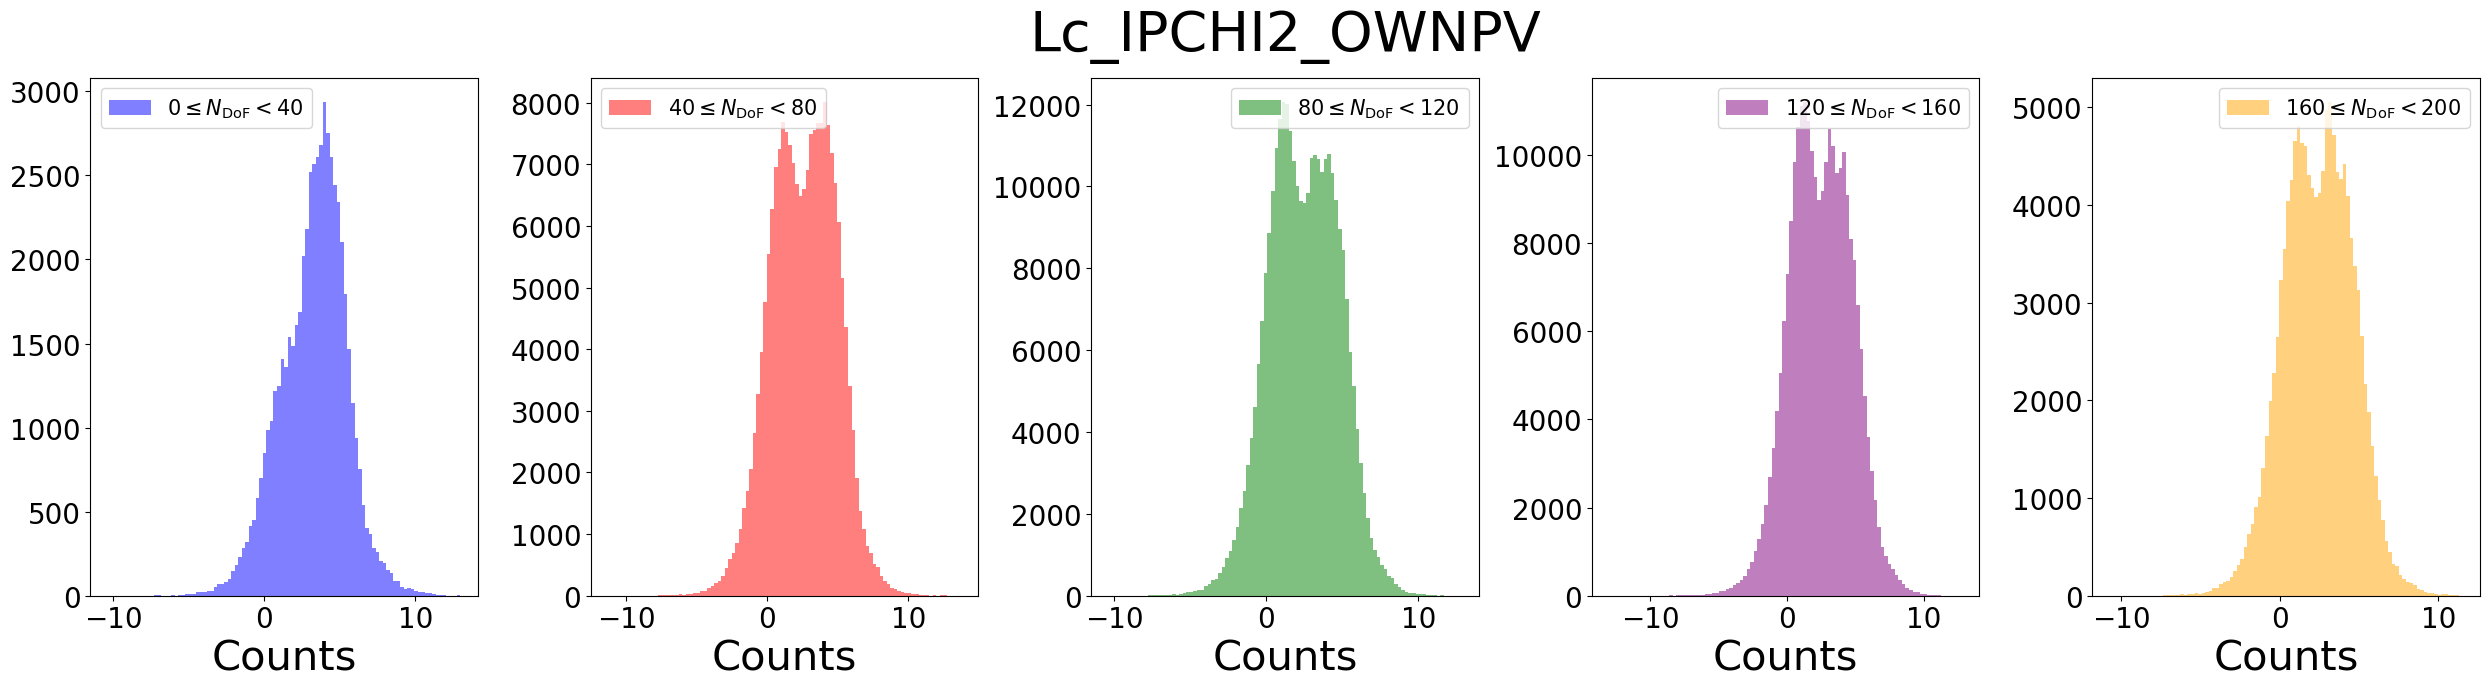

In [17]:
# Plot the histogram for energy release with different degrees of freedom

# Assuming Lc_df is the correct DataFrame with columns 'Xicc_M', 'Lc_M', and 'Energy_release'


# Range of fitting:
xr2 = (2240, 2340)

# Use prompt Lc data:
pts2 = Lc_df['Lc_M']
pts2 = pts2[(xr2[0] < pts2) & (pts2 < xr2[1])]

# Binned Degrees of Freedom:
bins_dof = [(0, 40), (40, 80), (80, 120), (120, 160), (160, 200)]
colors = ['blue', 'red', 'green', 'purple', 'orange']

# Number of subplots
n_subplots = len(bins_dof)

fig, axes = plt.subplots(1, n_subplots, figsize=(5 * n_subplots, 7))

# Plot the histogram for energy release with different degrees of freedom
for idx, dof_range in enumerate(bins_dof):
    ax = axes[idx]
    
    mask = (Lc_df["Lc_OWNPV_NDOF"] > dof_range[0]) & (Lc_df["Lc_OWNPV_NDOF"] <= dof_range[1])
    pts_split = Lc_df[mask]['Lc_IPCHI2_OWNPV']
    
    # Use LaTeX formatting for the label
    label = f"${dof_range[0]} \leq N_{{\mathrm{{DoF}}}} < {dof_range[1]}$"
    
    ax.hist(np.log(pts_split), bins=100, color=colors[idx], alpha=0.5, label=label)
    
    # Set the title only for the first subplot and adjust the padding
    if idx == 2:
        ax.set_title('Lc_IPCHI2_OWNPV', fontsize=40, pad=20)  # Adjust the pad value as needed
    
    ax.set_xlabel('Counts', fontsize=30)  # Changed to xlabel for horizontal layout
    ax.legend(fontsize=15)

    ax.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.savefig('/home/bonacci/Results/LbtoLc.pdf')
plt.show()

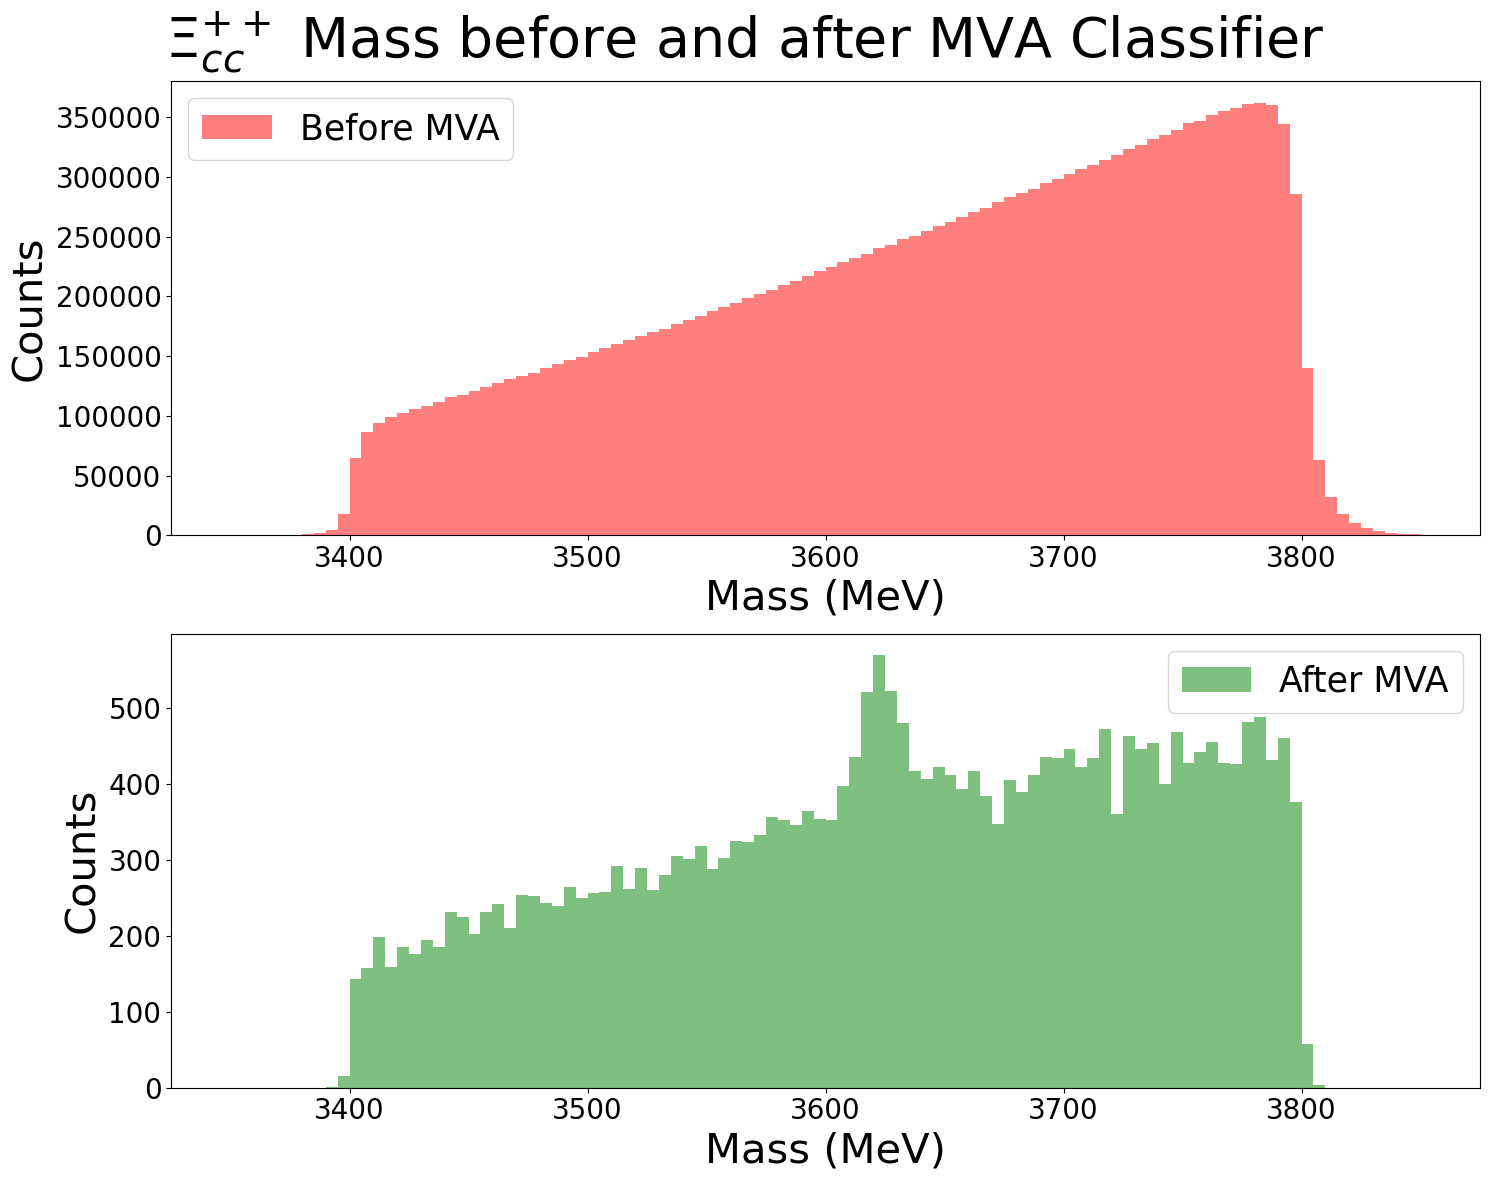

In [7]:
# Create a 3x1 subplot grid
fig, axs = plt.subplots(2, 1, figsize=(15, 12))

# Define the x-axis range
x_range = (3350, 3850)

# Plot the histogram for energy release
axs[0].hist(Xicc_uncut_Data['Xicc_M'], bins=100, range=x_range, color='red', alpha=0.5, label='Before MVA')
axs[0].set_xlabel('Mass (MeV)', fontsize=30)
axs[0].set_ylabel('Counts', fontsize=30)
axs[0].legend(fontsize=25)
axs[0].tick_params(axis='both', which='major', labelsize=20)

# Plot the histogram for Xicc masses
axs[1].hist(Xicc_df['Xicc_M'], bins=100, range=x_range, color='green', alpha=0.5, label='After MVA')
axs[1].set_xlabel('Mass (MeV)', fontsize=30)
axs[1].set_ylabel('Counts', fontsize=30)
axs[1].legend(fontsize=25)
axs[1].tick_params(axis='both', which='major', labelsize=20)

# Set the overall title for the figure
fig.suptitle('$\Xi_{cc}^{++}$ Mass before and after MVA Classifier', fontsize=40)  # y parameter slightly adjusts the title position

# Ensure the layout looks good
plt.tight_layout()

# If you want to save the figure, uncomment the following line
plt.savefig('/home/bonacci/Results/Mass_after_classifier.pdf')
plt.show()


The energy release can be seen below, and this energy release can be 

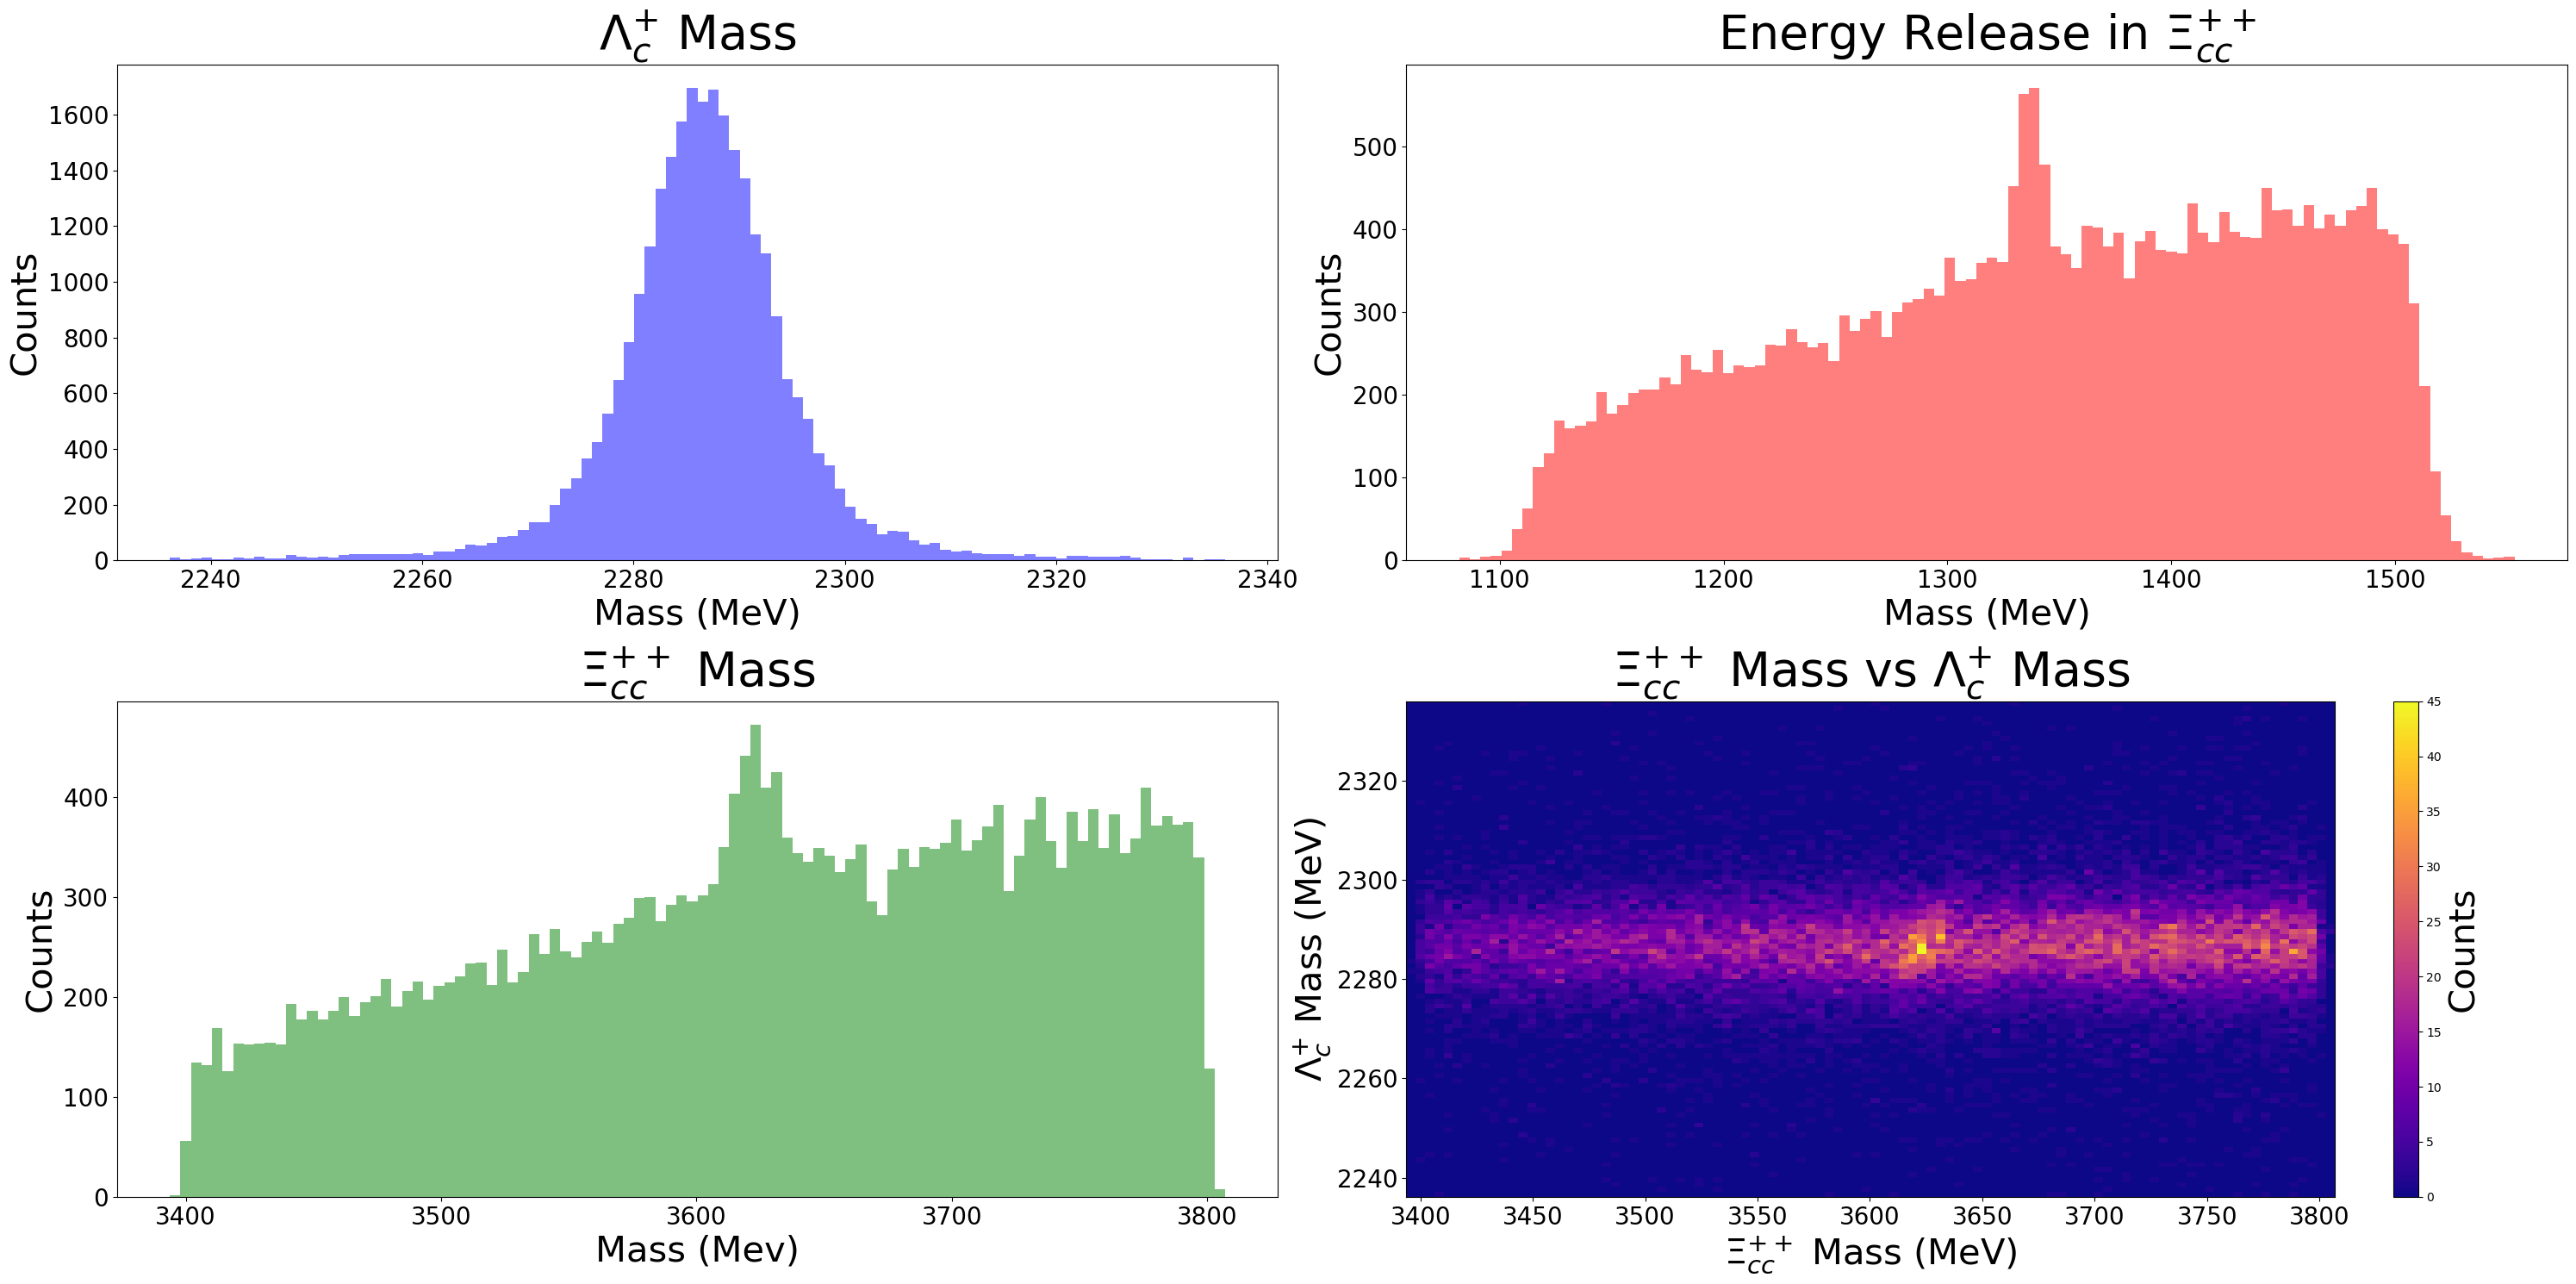

In [11]:
# Assuming Xicc_data is a DataFrame with columns 'Xicc_M' and 'Lc_M'

# Create a 3x1 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(30, 15))

# Plot the histogram for Lc masses
axs[0,0].hist(Xicc_df['Lc_M'], bins=100, color='blue', alpha=0.5, label='Lc Mass')
axs[0,0].set_title('$\Lambda_{c}^{+}$ Mass', fontsize=40)
axs[0,0].set_xlabel('Mass (MeV)', fontsize=30)
axs[0,0].set_ylabel('Counts', fontsize=30)

axs[0,0].tick_params(axis='both', which='major', labelsize=20)

# Plot the histogram for Xicc masses
axs[1,0].hist(Xicc_df['Xicc_M'], bins=100, color='green', alpha=0.5, label='Xicc Mass')
axs[1,0].set_title('$\Xi_{cc}^{++}$ Mass', fontsize=40)
axs[1,0].set_xlabel('Mass (Mev)', fontsize=30)
axs[1,0].set_ylabel('Counts', fontsize=30)

axs[1,0].tick_params(axis='both', which='major', labelsize=20)

# Plot the histogram for energy release
axs[0,1].hist(Xicc_df['Energy_release'], bins=100, color='red', alpha=0.5, label='Energy Release')
axs[0,1].set_title('Energy Release in $\Xi_{cc}^{++}$', fontsize=40)
axs[0,1].set_xlabel('Mass (MeV)', fontsize=30)
axs[0,1].set_ylabel('Counts', fontsize=30)

axs[0,1].tick_params(axis='both', which='major', labelsize=20)

# Plot the 2D histogram for Xicc masses vs Lc masses
h = axs[1,1].hist2d(Xicc_data['Xicc_M'], Xicc_data['Lc_M'], bins=100, cmap='plasma')
axs[1,1].set_title('$\Xi_{cc}^{++}$ Mass vs $\Lambda_{c}^{+}$ Mass', fontsize=40)
axs[1,1].set_xlabel('$\Xi_{cc}^{++}$ Mass (MeV)', fontsize=30)
axs[1,1].set_ylabel('$\Lambda_{c}^{+}$ Mass (MeV)', fontsize=30)
cbar = plt.colorbar(h[3], ax=axs[1,1])
cbar.set_label('Counts', fontsize=30)

axs[1,1].tick_params(axis='both', which='major', labelsize=20)



plt.tight_layout()
plt.savefig('/home/bonacci/Results/Energy_Release.pdf')
plt.show()

In [18]:
# Used Modules:

import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from iminuit import cost, Minuit
from numba_stats import truncnorm, truncexpon, crystalball_ex
from scipy.stats import uniform

In [19]:
# Producing Extended Unbinned Fit of all Energy Release Data:

# Range of fitting:
xr = (1200, 1500)

pts = Xicc_df['Energy_release']

pts = pts[(xr[0] < pts) & (pts < xr[1])]


# Gaussian for signal and Exponential for background:
def density(x, s, b, mu, sigma, A, B, C):
    return s + b, (s * truncnorm.pdf(x, *xr, mu + xr[0], sigma) +
        b * ((1/(549000000 * A + 405000 * B + 300 * C)) * (A * x**2 + B * x + C)))

c = cost.ExtendedUnbinnedNLL(pts, density)

m = Minuit(c, s = 1000, b = 30000, mu = 130.1, sigma = 1, A=-10, B = 10, C = 10)
m.limits["b", "s"] = (0, None)
m.limits["mu"] = (0, xr[1] - xr[0])
m.migrad()
# m.interactive()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.546e+05                 │              Nfcn = 989              │
│ EDM = 0.000153 (Goal: 0.0002)    │            time = 1.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s     │    670    │    60     │            │            │    0    │         │       │
│ 1 │ b     │  22.33e3  │  0.15e3   │            │            │    0    │         │       │
│ 2 │ mu    │   136.5   │    0.5    │            │            │    0    │   300   │       │
│ 3 │ sigma │    5.2    │    0.5    │            │            │         │         │       │
│ 4 │ A     │    105    │     8     │            │            │         │         │       │
│ 5 │ B     │ -0.316e6  │  0.011e6  │            │            │         │         │       │
│ 6 │ C     │   218e6   │    5e6    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────────────────────────────────────────────────────────────────────┐
│       │            s            b           mu        sigma            A            B            C │
├───────┼────────────────────────────────────────────────────────────────────────────────────────────┤
│     s │      3.8e+03         -3e3         0.51        16.48         -250        324e3   -139.990e6 │
│     b │         -3e3      2.4e+04        -0.49       -15.88          240     -0.313e6    135.449e6 │
│    mu │         0.51        -0.49         0.21         0.01        -0.00        -3.70   -1.52207e3 │
│ sigma │        16.48       -15.88         0.01        0.225        -1.30    1.68644e3 -728.66036e3 │
│     A │         -250          240        -0.00        -1.30         59.3     -81.40e3   36.92145e6 │
│     B │        324e3     -0.313e6        -3.70    1.68644e3     -81.40e3     1.19e+08     -57.12e9 │
│     C │   -139.990e6    135.449e6   -1.52207e3 -728.66036e3   36.92145e6     -57.12e9     2.88e+13 │
└───────┴────────────────────────────────────────────────────────────────────────────────────────────┘

In [20]:
# Taking the fit parameters:

best_fit_values_Xicc = m.values

Signal_integral = best_fit_values_Xicc['s']

Background_integral = best_fit_values_Xicc['b']

mu = best_fit_values_Xicc['mu']

sigma = best_fit_values_Xicc['sigma']

A = best_fit_values_Xicc['A']

B = best_fit_values_Xicc['B']

C = best_fit_values_Xicc['C']

In [21]:
# Extracting the best fit values and uncertainties for each parameter
best_fit_values = {
    "Signal_integral": {"value": m.values['s'], "error": m.errors['s']},
    "Background_integral": {"value": m.values['b'], "error": m.errors['b']},
    "mu": {"value": m.values['mu'], "error": m.errors['mu']},
    "sigma": {"value": m.values['sigma'], "error": m.errors['sigma']},
    "A": {"value": m.values['A'], "error": m.errors['A']},
    "B": {"value": m.values['B'], "error": m.errors['B']},
    "C": {"value": m.values['C'], "error": m.errors['C']}
}

# Printing the best fit parameters along with their uncertainties
for param_name, param_info in best_fit_values.items():
    print(f"{param_name}: {param_info['value']} ± {param_info['error']}")


Signal_integral: 670.7648078469781 ± 61.6814474782729
Background_integral: 22329.308142088776 ± 154.92144148116495
mu: 136.51322924150597 ± 0.4578186288800481
sigma: 5.1568642944378915 ± 0.47409338483207897
A: 104.85984419123162 ± 7.699081793828097
B: -316484.5683409977 ± 10926.943744970125
C: 217684623.76799038 ± 5365800.383642223


In [ ]:
    # Evaluate just the signal part:
    signal_part = (10)*(len(pts_list_Xicc[i])/(m.values[s_vector[i]] + m.values[b_vector[i]])) * m.values[s_vector[i]] * truncnorm.pdf(x_values, *xr, m.values['mu'] + xr[0], m.values['sigma'])

    # Evaluate just the background part:
    background_part = (10)*(len(pts_list_Xicc[i])/(m.values[s_vector[i]] + m.values[b_vector[i]])) * m.values[b_vector[i]] * ((1/(549000000 * m.values[A_vector[i]] + 405000 * m.values[B_vector[i]] + 300 * m.values[C_vector[i]])) * (m.values[A_vector[i]] * x_values**2 + m.values[B_vector[i]] * x_values + m.values[C_vector[i]]))
    
    # Plotting
    ax.plot(x_values, signal_part + background_part, 'b-', label= "Fit results")
    ax.plot(x_values, signal_part, 'g--', label='Signal')
    ax.plot(x_values, background_part, 'r--', label='Background')
    
    # Calculate histogram data
    counts, bin_edges = np.histogram(pts_list_Xicc[i], bins=30)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_widths = (-bin_edges[:-1] + bin_edges[1:]) / 2
    y_err = np.sqrt(counts)
    
    # Plot midpoints with error bars
    ax.errorbar(bin_centers, counts, xerr= bin_widths,  yerr=y_err, fmt='o', color='black', label="Data")

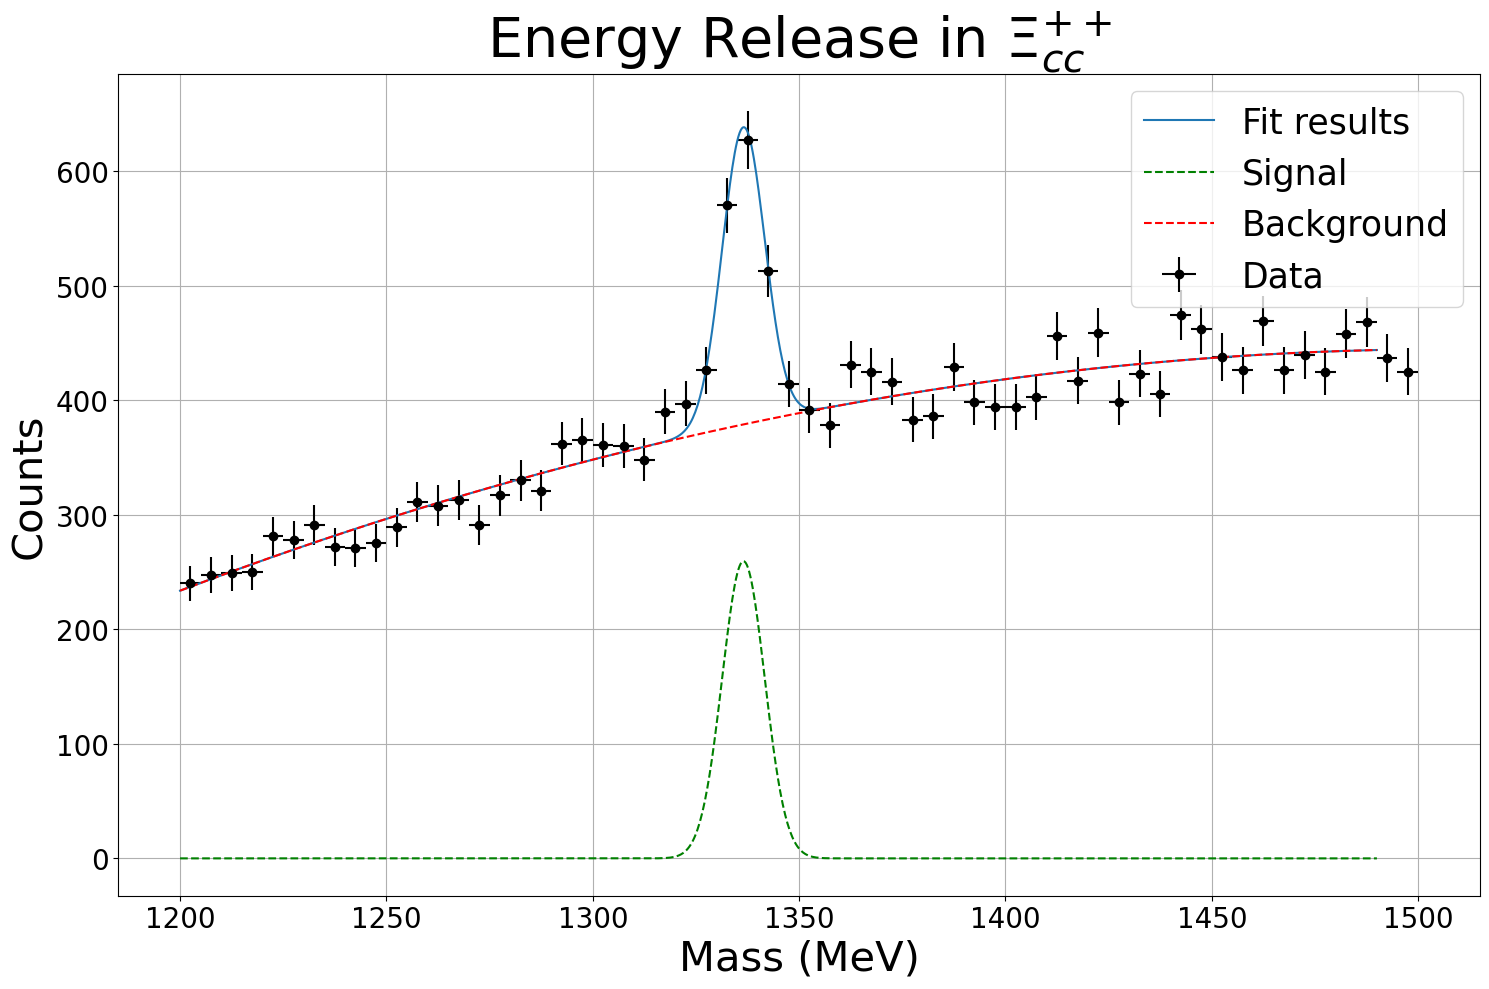

In [26]:
# Producing Extended Unbinned Fit and Save:

# Generate x values for plotting:
x_values = np.linspace(xr[0], xr[1]-10, 1000) #Truncated as it would go to 0 at xr[1]

# Evaluate just the signal part:
signal_part = (5)*(len(pts)/(Signal_integral +Background_integral)) * Signal_integral * truncnorm.pdf(x_values, *xr, mu + xr[0], sigma)

# Evaluate just the background part:
background_part = (5)*(len(pts)/(Signal_integral +Background_integral)) * Background_integral *  ((1/(549000000 * A + 405000 * B + 300 * C)) * (A * x_values**2 + B * x_values + C))

fig, axs = plt.subplots(figsize=(15, 10))

# Calculate histogram data
counts, bin_edges = np.histogram(pts, bins=60)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_widths = (-bin_edges[:-1] + bin_edges[1:]) / 2
y_err = np.sqrt(counts)

axs.errorbar(bin_centers, counts, xerr= bin_widths,  yerr=y_err, fmt='o', color='black', label="Data")

axs.plot(x_values, signal_part+background_part, label='Fit results')
plt.plot(x_values, signal_part, 'g--', label='Signal')
plt.plot(x_values, background_part, 'r--', label='Background')

# axs.axvline(mu+xr[0], color ='r', linestyle = '--')
axs.set_title('Energy Release in $\Xi_{cc}^{++}$', fontsize=40)
axs.set_xlabel('Mass (MeV)', fontsize=30)
axs.set_ylabel('Counts', fontsize=30)
axs.tick_params(axis='both', which='major', labelsize=20)

axs.legend(fontsize=25)
plt.grid(True)

plt.tight_layout()
plt.savefig('/home/bonacci/Results/Isolated_signal_background_from_mass_fit.pdf')
plt.show()

We can now perform the mass fit on the energy release. This mass can be seen below.

In [51]:
print('mu =', mu+xr[0]+2286.48 , '+-', m.errors['mu']+0.14, '+- more error')

mu = 3533.8727269442556 +- 0.5894215419806551 +- more error


Though what is epscially important for this study is the number of $\Xi_{cc}^{++}$ and $\Lambda_{c}^{+}$ events depedent on the Degrees of Freedom (which is essentially the number charged track from the PV). Hence, we must distribute our data according to bin values to extract the yields of $\Xi_{cc}^{++}$ and $\Lambda_{c}^{+}$ events per degrees of freedom bin range. 

We can use our full signal mass peaks of the $\Xi_{cc}^{++}$ and $\Lambda_{c}^{+}$ fitted in order to correct for our fits in different degrees of freedom ranges.

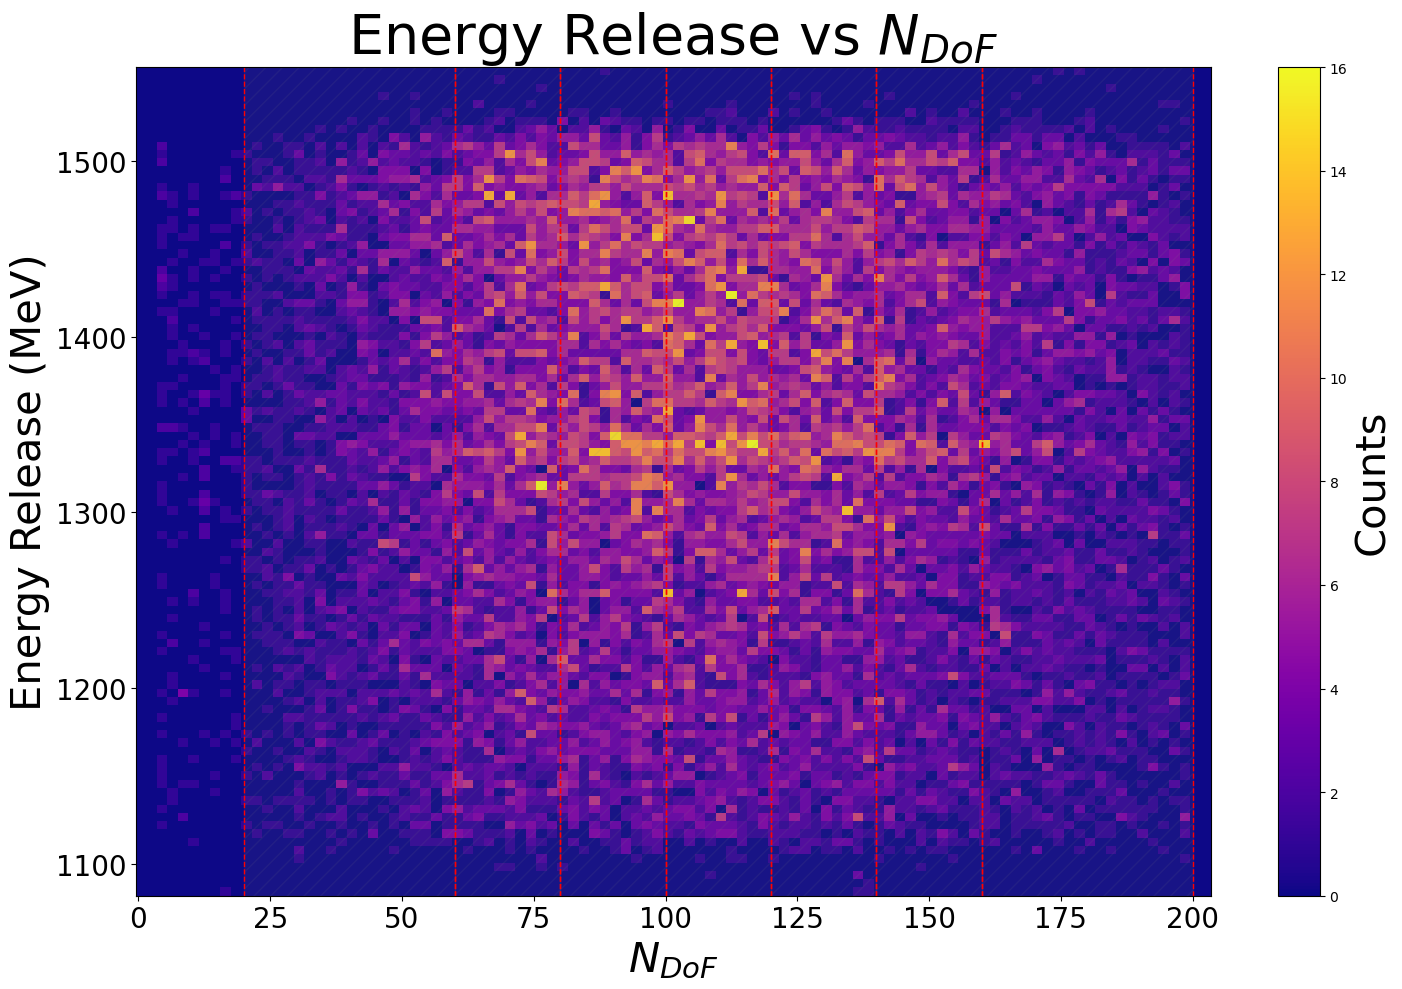

In [27]:
# Create a 2D histogram plot
fig, ax = plt.subplots(figsize=(15, 10))

# Define bin edges for DOF
dof_bins = np.arange(-0.5, 205.5, 2)

h = ax.hist2d(
    Xicc_df[Xicc_df["Xicc_OWNPV_NDOF"] <= 200]["Xicc_OWNPV_NDOF"], 
    Xicc_df[Xicc_df["Xicc_OWNPV_NDOF"] <= 200]['Energy_release'], 
    bins=[dof_bins, 100], 
    cmap='plasma'
)

ax.set_title('Energy Release vs $N_{DoF}$', fontsize=40)
ax.set_xlabel('$N_{DoF}$', fontsize=30)
ax.set_ylabel('Energy Release (MeV)', fontsize=30)
cbar = plt.colorbar(h[3], ax=ax)
cbar.set_label('Counts', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)


# Add shaded regions at specified bin ranges
bin_ranges = [(20, 60), (60, 80), (80, 100), (100, 120), (120, 140), (140, 160), (160, 200)]
colors = ['grey'] * len(bin_ranges)  # Define a list of colors for the shaded regions

for bin_range, color in zip(bin_ranges, colors):
    ax.axvspan(bin_range[0], bin_range[1], color=color, alpha=0.1, hatch='//')
    ax.axvline(bin_range[0], color='red', linestyle='--', linewidth=1)
    ax.axvline(bin_range[1], color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.savefig('/home/bonacci/Results/Energy_releasevsdof.pdf')
plt.show()


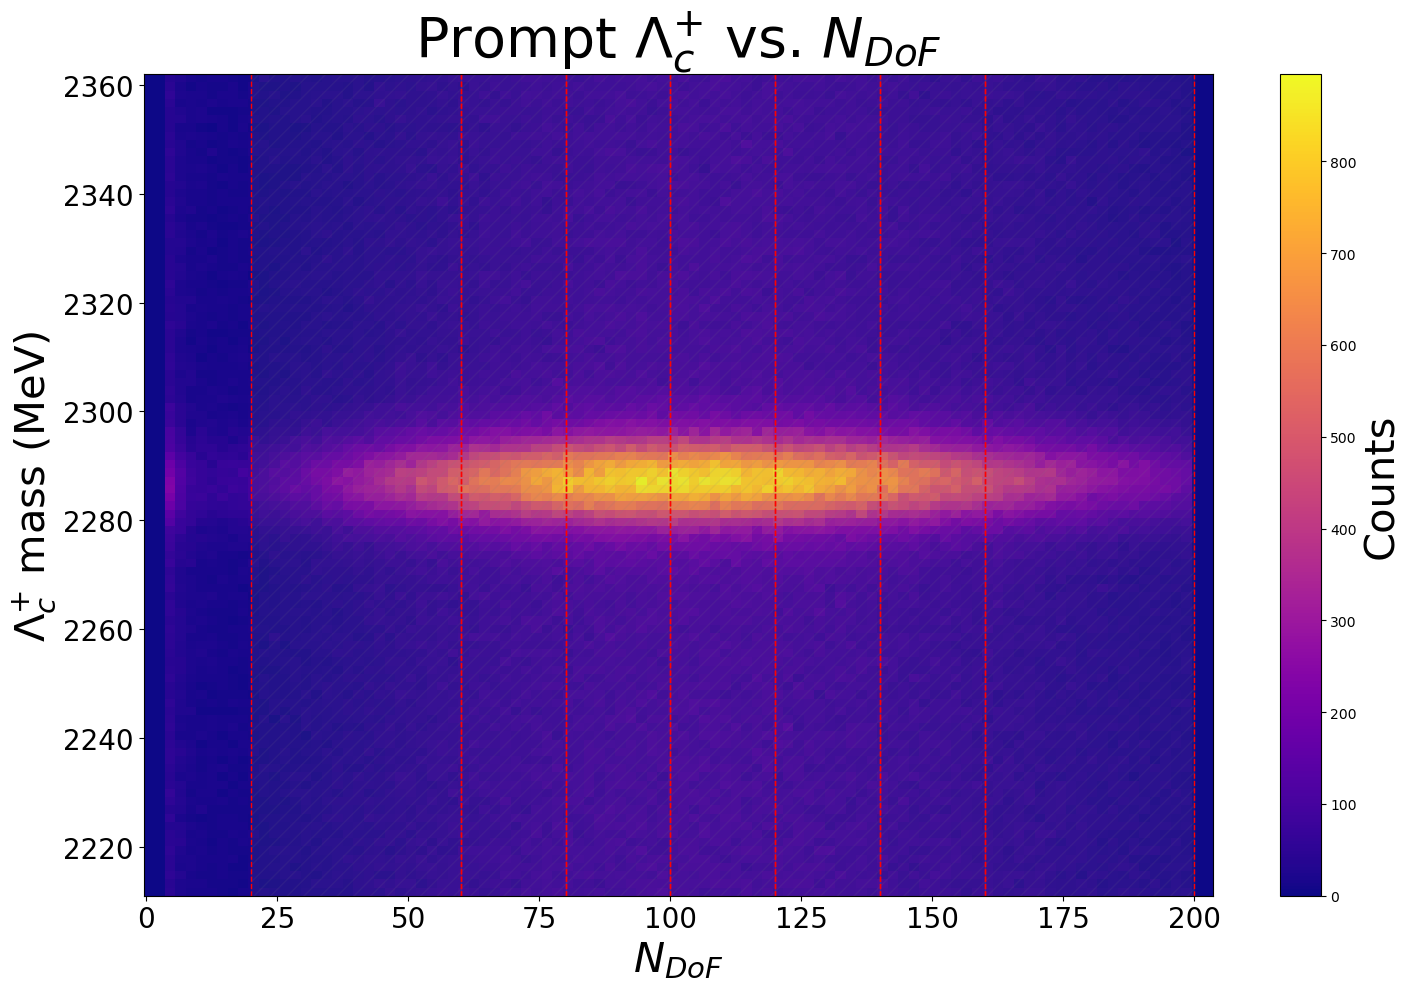

In [28]:
# Create a 2D histogram plot
fig, ax = plt.subplots(figsize=(15, 10))

h = ax.hist2d(
    Lc_df[Lc_df["Lc_OWNPV_NDOF"] <= 200]["Lc_OWNPV_NDOF"], 
    Lc_df[Lc_df["Lc_OWNPV_NDOF"] <= 200]['Lc_M'], 
    bins=[dof_bins, 100], 
    cmap='plasma'
)

ax.set_title('Prompt $\Lambda_{c}^{+}$ vs. $N_{DoF}$', fontsize=40)
ax.set_xlabel('$N_{DoF}$', fontsize=30)
ax.set_ylabel('$\Lambda_{c}^{+}$ mass (MeV)', fontsize=30)
cbar = plt.colorbar(h[3], ax=ax)
cbar.set_label('Counts', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

# Add shaded regions at specified bin ranges
bin_ranges = [(20, 60), (60, 80), (80, 100), (100, 120), (120, 140), (140, 160), (160, 200)]
colors = ['grey'] * len(bin_ranges)  # Define a list of colors for the shaded regions

for bin_range, color in zip(bin_ranges, colors):
    ax.axvspan(bin_range[0], bin_range[1], color=color, alpha=0.1, hatch='//')
    ax.axvline(bin_range[0], color='red', linestyle='--', linewidth=1)
    ax.axvline(bin_range[1], color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.savefig('/home/bonacci/Results/Lcvsdof.pdf')
plt.show()


In [29]:
# Create different equal range of nDOF to cut up the data:

def split_by_custom_dof_ranges(Xicc_df, custom_bins, xr=(1200, 1500), xr2=(2240, 2340)):
    pts_dof_splits_Xicc = []
    pts_dof_splits_Lc = []
    
    for dof_range in custom_bins:
        mask = (Xicc_df["Xicc_OWNPV_NDOF"] > dof_range[0]) & (Xicc_df["Xicc_OWNPV_NDOF"] <= dof_range[1])
        mask2 = (Lc_df["Lc_OWNPV_NDOF"] > dof_range[0]) & (Lc_df["Lc_OWNPV_NDOF"] <= dof_range[1])
        pts_split_Xicc = Xicc_df[mask]['Energy_release']
        pts_split_Lc = Lc_df[mask2]['Lc_M']   

        pts_split_Xicc = pts_split_Xicc[(xr[0] < pts_split_Xicc) & (pts_split_Xicc < xr[1])]
        pts_split_Lc = pts_split_Lc[(xr2[0] < pts_split_Lc) & (pts_split_Lc < xr2[1])]

        pts_dof_splits_Xicc.append(pts_split_Xicc)
        pts_dof_splits_Lc.append(pts_split_Lc)
        
    return (custom_bins, pts_dof_splits_Xicc, pts_dof_splits_Lc)

# Define custom bin ranges
custom_bins = [(20, 60), (60, 80), (80, 100), (100, 120), (120, 140), (140, 160), (160, 200)]

# Get points for custom bin ranges
dof_ranges, pts_list_Xicc, pts_list_Lc = split_by_custom_dof_ranges(Xicc_df, custom_bins)

#### Fitting the Energy Release for the counts of the $\Xi_{cc}^{++}$ yields per ndof

In [30]:
dof_ranges

[(20, 60), (60, 80), (80, 100), (100, 120), (120, 140), (140, 160), (160, 200)]

##### NDOF $\Xi_{cc}^{++}$ energy release fits:

In [31]:
# Joint fit with shared parameters:
from iminuit.cost import ExtendedUnbinnedNLL
from iminuit.util import describe

# Gaussian for signal and Exponential for background:
def density1(x, s1, b1, mu, sigma, A1, B1, C1):
    return s1 + b1, (s1 * truncnorm.pdf(x, *xr, mu + xr[0], sigma) +
        b1 * ((1/(549000000 * A1 + 405000 * B1 + 300 * C1)) * (A1 * x**2 + B1 * x + C1)))

def density2(x, s2, b2, mu, sigma, A2, B2, C2):
    return s2 + b2, (s2 * truncnorm.pdf(x, *xr, mu + xr[0], sigma) +
        b2 * ((1/(549000000 * A2 + 405000 * B2 + 300 * C2)) * (A2 * x**2 + B2 * x + C2)))

def density3(x, s3, b3, mu, sigma, A3, B3, C3):
    return s3 + b3, (s3 * truncnorm.pdf(x, *xr, mu + xr[0], sigma) +
        b3 * ((1/(549000000 * A3 + 405000 * B3 + 300 * C3)) * (A3 * x**2 + B3 * x + C3)))

def density4(x, s4, b4, mu, sigma, A4, B4, C4):
    return s4 + b4, (s4 * truncnorm.pdf(x, *xr, mu + xr[0], sigma) +
        b4 * ((1/(549000000 * A4 + 405000 * B4 + 300 * C4)) * (A4 * x**2 + B4 * x + C4)))

def density5(x, s5, b5, mu, sigma, A5, B5, C5):
    return s5 + b5, (s5 * truncnorm.pdf(x, *xr, mu + xr[0], sigma) +
        b5 * ((1/(549000000 * A5 + 405000 * B5 + 300 * C5)) * (A5 * x**2 + B5 * x + C5)))

def density6(x, s6, b6, mu, sigma, A6, B6, C6):
    return s6 + b6, (s6 * truncnorm.pdf(x, *xr, mu + xr[0], sigma) +
        b6 * ((1/(549000000 * A6 + 405000 * B6 + 300 * C6)) * (A6 * x**2 + B6 * x + C6)))

def density7(x, s7, b7, mu, sigma, A7, B7, C7):
    return s7 + b7, (s7 * truncnorm.pdf(x, *xr, mu + xr[0], sigma) +
        b7 * ((1/(549000000 * A7 + 405000 * B7 + 300 * C7)) * (A7 * x**2 + B7 * x + C7)))

# combine two log-likelihood functions by adding them
lh = (ExtendedUnbinnedNLL(pts_list_Xicc[0], density1) 
      + ExtendedUnbinnedNLL(pts_list_Xicc[1], density2)
      + ExtendedUnbinnedNLL(pts_list_Xicc[2], density3)
      + ExtendedUnbinnedNLL(pts_list_Xicc[3], density4)
      + ExtendedUnbinnedNLL(pts_list_Xicc[4], density5)
      + ExtendedUnbinnedNLL(pts_list_Xicc[5], density6)
      + ExtendedUnbinnedNLL(pts_list_Xicc[6], density7))

print(f"{describe(lh)=}")

describe(lh)=['s1', 'b1', 'mu', 'sigma', 'A1', 'B1', 'C1', 's2', 'b2', 'A2', 'B2', 'C2', 's3', 'b3', 'A3', 'B3', 'C3', 's4', 'b4', 'A4', 'B4', 'C4', 's5', 'b5', 'A5', 'B5', 'C5', 's6', 'b6', 'A6', 'B6', 'C6', 's7', 'b7', 'A7', 'B7', 'C7']


In [32]:
m = Minuit(lh, s1 = 36, 
           s2 = 73, 
           s3 = 112,
           s4 = 76, 
           s5 = 100.79, 
           s6 = 120, 
           s7 = 100,
           b1 = len(pts_list_Xicc[0]), 
           b2 = len(pts_list_Xicc[1])-65, 
           b3 = (Background_integral/len(pts)) * len(pts_list_Xicc[2]), 
           b4 = (Background_integral/len(pts)) * len(pts_list_Xicc[3]), 
           b5 = (Background_integral/len(pts)) * len(pts_list_Xicc[4]), 
           b6 = (Background_integral/len(pts)) * len(pts_list_Xicc[5]), 
           b7 = (Background_integral/len(pts)) * len(pts_list_Xicc[6]), 
           mu = mu, 
           sigma = sigma, 
           A1 = A,
           A2 = A,
           A3 = A,
           A4 = A,
           A5 = A,
           A6 = A,
           A7 = A,
           B1 = B,
           B2 = B,
           B3 = B,
           B4 = B,
           B5 = B,
           B6 = B,
           B7 = B,
           C1 = C,
           C2 = C,
           C3 = C,
           C4 = C,
           C5 = C,
           C6 = C,
           C7 = C)

m.limits["b1", "s1", "b2", "s2", "b3", "s3", "b4", "s4", "b5", "s5", "b6", "s6", "b7", "s7"] = (0, None)
m.limits["mu"] = (mu - 1 * sigma, mu + 1 * sigma)
m.limits["sigma"] = (0, 3 * sigma)
m.migrad()
# m.interactive()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -5.91e+04                  │             Nfcn = 2956              │
│ EDM = 0.00199 (Goal: 0.0002)     │            time = 5.0 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1    │    28     │    13     │            │            │    0    │         │       │
│ 1 │ b1    │  2.32e3   │  0.05e3   │            │            │    0    │         │       │
│ 2 │ mu    │   136.6   │    0.4    │            │            │ 131.356 │ 141.67  │       │
│ 3 │ sigma │    5.2    │    0.4    │            │            │    0    │ 15.4706 │       │
│ 4 │ A1    │    111    │    12     │            │            │         │         │       │
│ 5 │ B1    │ -0.330e6  │  0.024e6  │            │            │         │         │       │
│ 6 │ C1    │  0.218e9  │  0.015e9  │            │            │         │         │       │
│ 7 │ s2    │    71     │    16     │            │            │    0    │         │       │
│ 8 │ b2    │  2.89e3   │  0.05e3   │            │            │    0    │         │       │
│ 9 │ A2    │    103    │    17     │            │            │         │         │       │
│ 10│ B2    │ -0.318e6  │  0.015e6  │            │            │         │         │       │
│ 11│ C2    │   218e6   │    8e6    │            │            │         │         │       │
│ 12│ s3    │    125    │    19     │            │            │    0    │         │       │
│ 13│ b3    │  3.48e3   │  0.06e3   │            │            │    0    │         │       │
│ 14│ A3    │    95     │    14     │            │            │         │         │       │
│ 15│ B3    │ -0.309e6  │  0.010e6  │            │            │         │         │       │
│ 16│ C3    │   218e6   │    5e6    │            │            │         │         │       │
│ 17│ s4    │    127    │    19     │            │            │    0    │         │       │
│ 18│ b4    │  3.71e3   │  0.06e3   │            │            │    0    │         │       │
│ 19│ A4    │   107.9   │    3.4    │            │            │         │         │       │
│ 20│ B4    │  -317e3   │    4e3    │            │            │         │         │       │
│ 21│ C4    │  217.7e6  │   2.3e6   │            │            │         │         │       │
│ 22│ s5    │    94     │    17     │            │            │    0    │         │       │
│ 23│ b5    │  3.23e3   │  0.05e3   │            │            │    0    │         │       │
│ 24│ A5    │   112.0   │    2.3    │            │            │         │         │       │
│ 25│ B5    │ -320.7e3  │   3.1e3   │            │            │         │         │       │
│ 26│ C5    │  217.7e6  │   2.0e6   │            │            │         │         │       │
│ 27│ s6    │    99     │    16     │            │            │    0    │         │       │
│ 28│ b6    │  2.50e3   │  0.05e3   │            │            │    0    │         │       │
│ 29│ A6    │    95     │    17     │            │            │         │         │       │
│ 30│ B6    │ -0.307e6  │  0.013e6  │            │  

In [33]:
# Taking the fit parameters:

Xicc_s1 = m.values['s1']
Xicc_s2 = m.values['s2']
Xicc_s3 = m.values['s3']
Xicc_s4 = m.values['s4']
Xicc_s5 = m.values['s5']
Xicc_s6 = m.values['s6']
Xicc_s7 = m.values['s7']

Xicc_s1_err = m.errors['s1']
Xicc_s2_err = m.errors['s2']
Xicc_s3_err = m.errors['s3']
Xicc_s4_err = m.errors['s4']
Xicc_s5_err = m.errors['s5']
Xicc_s6_err = m.errors['s6']
Xicc_s7_err = m.errors['s7']

signal_Xicc = [Xicc_s1, Xicc_s2, Xicc_s3, Xicc_s4, Xicc_s5, Xicc_s6, Xicc_s7]

signal_Xicc_err = [Xicc_s1_err, Xicc_s2_err, Xicc_s3_err, Xicc_s4_err, Xicc_s5_err, Xicc_s6_err, Xicc_s7_err]

In [34]:
signal_Xicc

[27.802512107739002,
 71.27772452692935,
 124.51798069906168,
 126.8398095064928,
 94.466270019938,
 99.13960241698945,
 95.60823298616248]

In [35]:
signal_Xicc_err

[12.995329717917878,
 16.203889448400115,
 19.06269068862379,
 19.409398066676438,
 17.52248328679493,
 16.328918118359418,
 20.54694842110171]

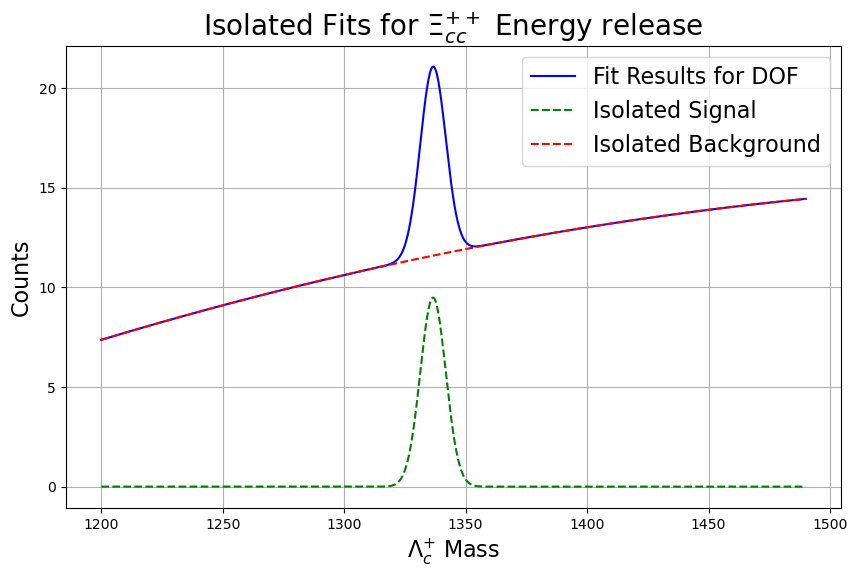

In [36]:
# Can check if it looks fine:

# Generate x values for plotting:
x_values = np.linspace(xr[0], xr[1]-10, 1000) #Truncated as it would go to 0 at xr[1]

# Evaluate just the signal part:
signal_part = m.values['s3'] * truncnorm.pdf(x_values, *xr, m.values['mu'] + xr[0], m.values['sigma'])

# Evaluate just the background part:
background_part = m.values['b3'] *  ((1/(549000000 * m.values['A3'] + 405000 * m.values['B3'] + 300 * m.values['C3'])) * (m.values['A3'] * x_values**2 + m.values['B3'] * x_values + m.values['C3']))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, signal_part + background_part, 'b-', label='Fit Results for DOF')
plt.plot(x_values, signal_part, 'g--', label='Isolated Signal')
plt.plot(x_values, background_part, 'r--', label='Isolated Background')
plt.title('Isolated Fits for $\Xi_{cc}^{++}$ Energy release', fontsize = 20)
plt.xlabel('$\Lambda_{c}^{+}$ Mass', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.legend(fontsize = 16)
plt.grid(True)
plt.show()

In [37]:
dof_ranges

[(20, 60), (60, 80), (80, 100), (100, 120), (120, 140), (140, 160), (160, 200)]

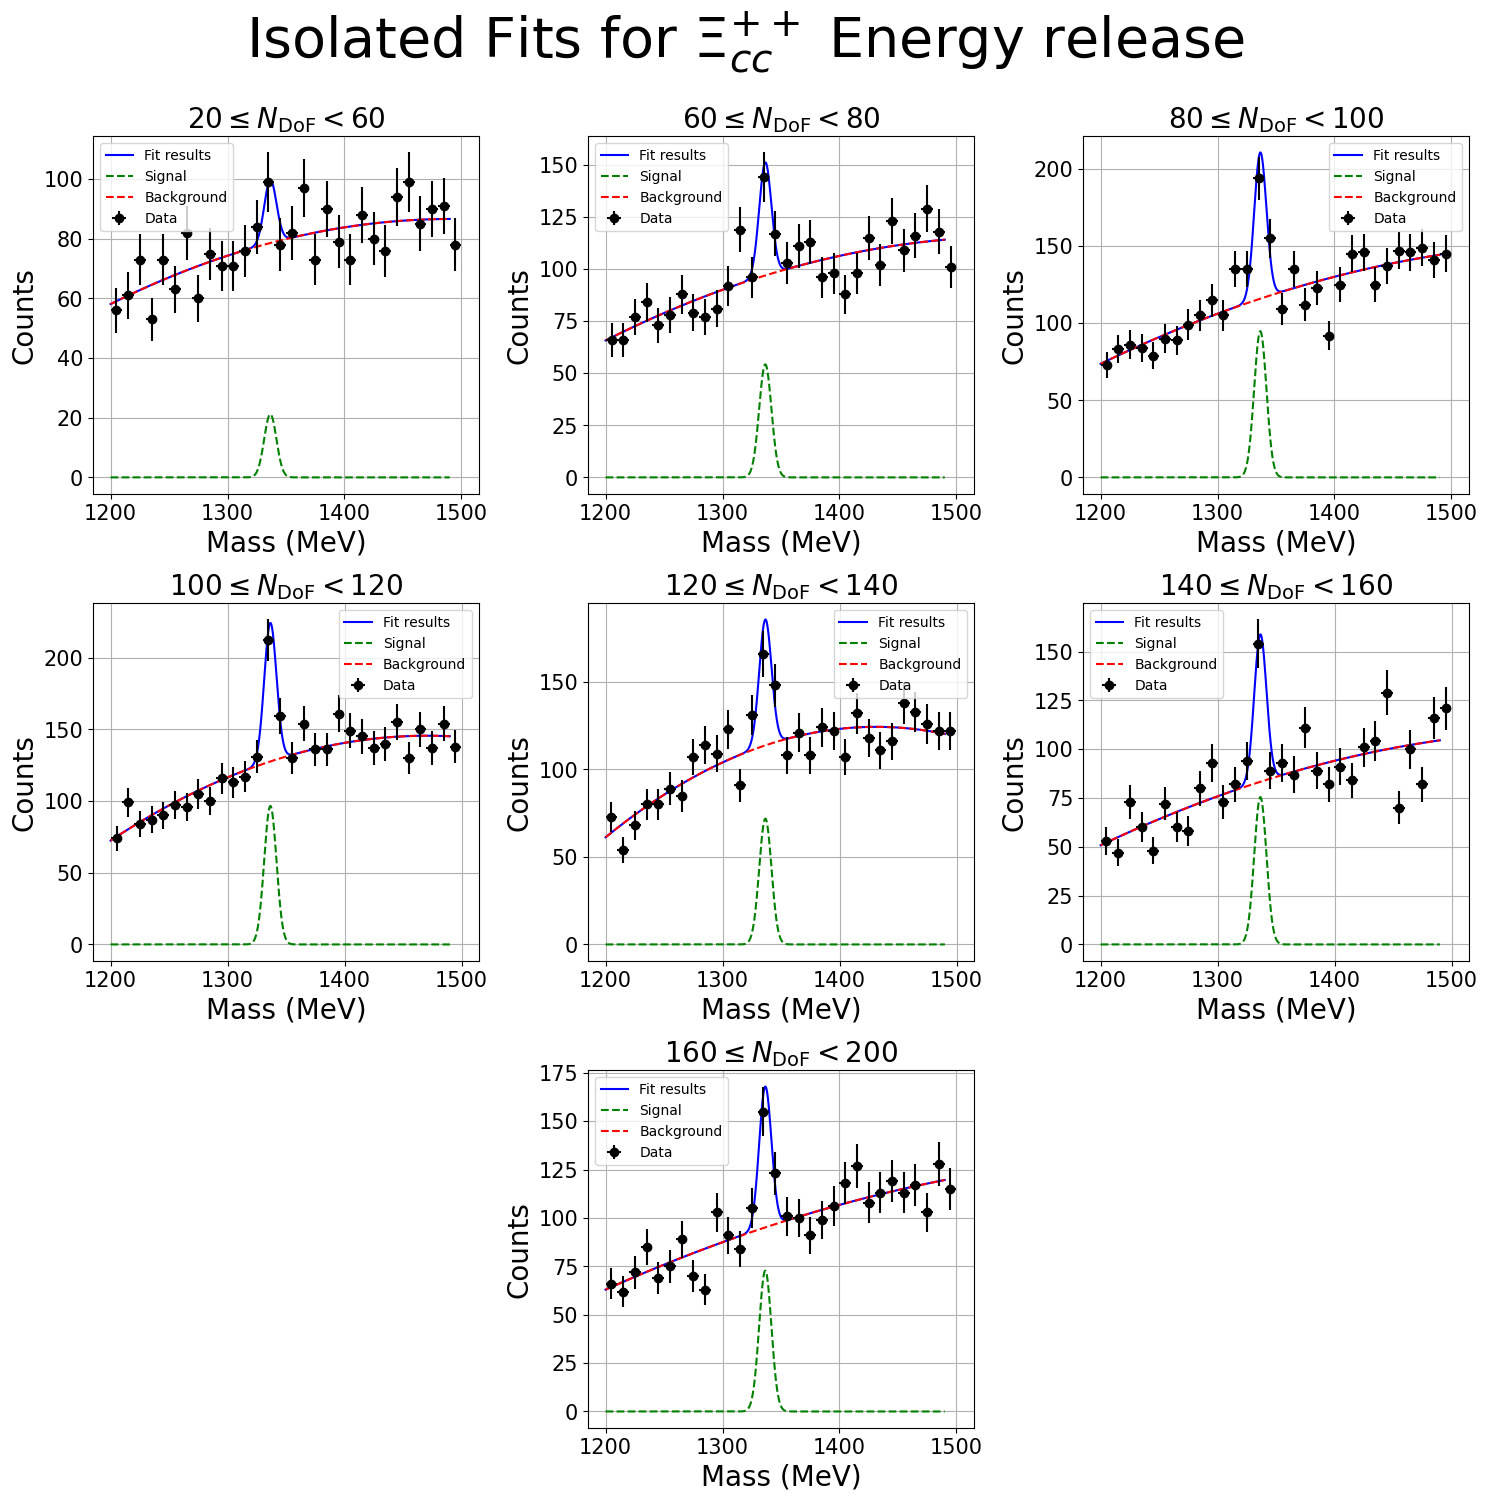

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Assuming m.values, xr, and other necessary variables are defined above this code

s_vector = ['s1', 's2', 's3', 's4', 's5', 's6', 's7']
b_vector = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7']
A_vector = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7']
B_vector = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
C_vector = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

fig = plt.figure(figsize=(15, 20))  # Adjust the size as needed
gs = GridSpec(4, 3, figure=fig)
fig.suptitle(f'Isolated Fits for $\Xi_{{cc}}^{{++}}$ Energy release', fontsize = 40)

# Generate x values for plotting:
x_values = np.linspace(xr[0], xr[1]-10, 1000) #Truncated as it would go to 0 at xr[1]

# Indices of the axes to populate (leaving the center of the last row empty)
indices_to_populate = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 1)]

for i, (row, col) in enumerate(indices_to_populate):
    ax = fig.add_subplot(gs[row, col])

    # Evaluate just the signal part:
    signal_part = (10)*(len(pts_list_Xicc[i])/(m.values[s_vector[i]] + m.values[b_vector[i]])) * m.values[s_vector[i]] * truncnorm.pdf(x_values, *xr, m.values['mu'] + xr[0], m.values['sigma'])

    # Evaluate just the background part:
    background_part = (10)*(len(pts_list_Xicc[i])/(m.values[s_vector[i]] + m.values[b_vector[i]])) * m.values[b_vector[i]] * ((1/(549000000 * m.values[A_vector[i]] + 405000 * m.values[B_vector[i]] + 300 * m.values[C_vector[i]])) * (m.values[A_vector[i]] * x_values**2 + m.values[B_vector[i]] * x_values + m.values[C_vector[i]]))
    
    # Plotting
    ax.plot(x_values, signal_part + background_part, 'b-', label= "Fit results")
    ax.plot(x_values, signal_part, 'g--', label='Signal')
    ax.plot(x_values, background_part, 'r--', label='Background')
    
    # Calculate histogram data
    counts, bin_edges = np.histogram(pts_list_Xicc[i], bins=30)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_widths = (-bin_edges[:-1] + bin_edges[1:]) / 2
    y_err = np.sqrt(counts)
    
    # Plot midpoints with error bars
    ax.errorbar(bin_centers, counts, xerr= bin_widths,  yerr=y_err, fmt='o', color='black', label="Data")
    
    ax.set_xlabel('Mass (MeV)', fontsize = 20)
    ax.set_ylabel('Counts', fontsize = 20)
    ax.legend(fontsize = 10)
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=15)

    # Set the title for each subplot
    ax.set_title(f"${dof_ranges[i][0]} \leq N_{{\mathrm{{DoF}}}} < {dof_ranges[i][1]}$", fontsize=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig('/home/bonacci/Results/Isolated_fits_energy_release.pdf')
plt.show()


Now we have ascertained the signal yield of $\Xi_{cc}^{++}$ in 8 different binned ranges of degrees of freedom.

$\Lambda_{c}^{+}$ fits:

In [39]:
# Producing Extended Unbinned Fit and Save:

# Range of fitting:
xr2 = (2240, 2340)

# Use prompt Lc data:
pts2 = Lc_df['Lc_M']

pts2 = pts2[(xr2[0] < pts2) & (pts2 < xr2[1])]

In [40]:
# Gaussian for signal and Exponential for background:
def density(x, s, b, mu, sigma, tau):
    return s + b, (s * truncnorm.pdf(x, *xr2, mu + xr2[0], sigma) +
        b * truncexpon.pdf(x, *xr2, xr2[0], tau))

c2 = cost.ExtendedUnbinnedNLL(pts2, density)

m2 = Minuit(c2, s = 30000, b = 10000, mu = pts2.mean(), sigma = 6, tau = 400)
m2.limits["s", "b", "sigma", "tau"] = (0, None)
m2.limits["mu"] = (0, xr2[1] - xr2[0])
m2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.35e+07                  │              Nfcn = 559              │
│ EDM = 1.31e-05 (Goal: 0.0002)    │           time = 43.9 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s     │  407.3e3  │   0.8e3   │            │            │    0    │         │       │
│ 1 │ b     │  400.1e3  │   0.8e3   │            │            │    0    │         │       │
│ 2 │ mu    │  47.393   │   0.012   │            │            │    0    │   100   │       │
│ 3 │ sigma │   5.711   │   0.011   │            │            │    0    │         │       │
│ 4 │ tau   │    830    │    40     │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────────────────────────────────┐
│       │          s          b         mu      sigma        tau │
├───────┼────────────────────────────────────────────────────────┤
│     s │   6.21e+05     -0.2e6 -157.18e-3    3.03118      0.9e3 │
│     b │     -0.2e6   6.11e+05  149.50e-3   -3.05077     -0.9e3 │
│    mu │ -157.18e-3  149.50e-3   0.000136         -0  -44.05e-3 │
│ sigma │    3.03118   -3.05077         -0   0.000126   11.48e-3 │
│   tau │      0.9e3     -0.9e3  -44.05e-3   11.48e-3   1.45e+03 │
└───────┴────────────────────────────────────────────────────────┘

In [41]:
# Taking the fit parameters:

best_fit_values = m2.values

Signal_integral = best_fit_values['s']

Background_integral = best_fit_values['b']

mu = best_fit_values['mu']

sigma = best_fit_values['sigma']

tau = best_fit_values['tau']

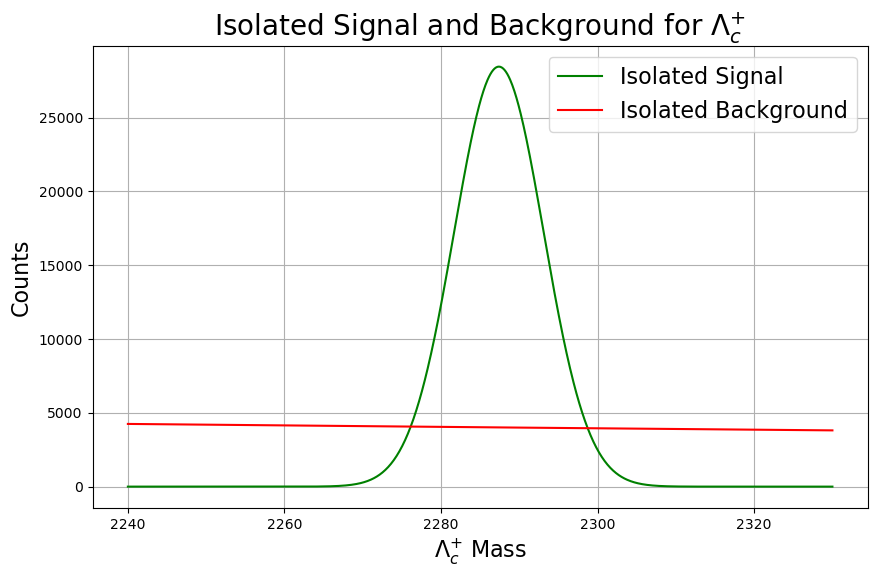

In [42]:
# Generate x values for plotting:
x_values = np.linspace(xr2[0], xr2[1]-10, 1000) #Truncated as it would go to 0 at xr2[1]

# Evaluate just the signal part:
signal_part = Signal_integral * truncnorm.pdf(x_values, *xr2, mu + xr2[0], sigma)

# Evaluate just the background part:
background_part = Background_integral * truncexpon.pdf(x_values, *xr2, xr2[0], tau)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, signal_part, 'g-', label='Isolated Signal')
plt.plot(x_values, background_part, 'r-', label='Isolated Background')
plt.title('Isolated Signal and Background for $\Lambda_{c}^{+}$', fontsize = 20)
plt.xlabel('$\Lambda_{c}^{+}$ Mass', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.legend(fontsize = 16)
plt.grid(True)
plt.savefig('/home/bonacci/Results/Isolated_signal_background_from__Lc_mass_fit')
plt.show()

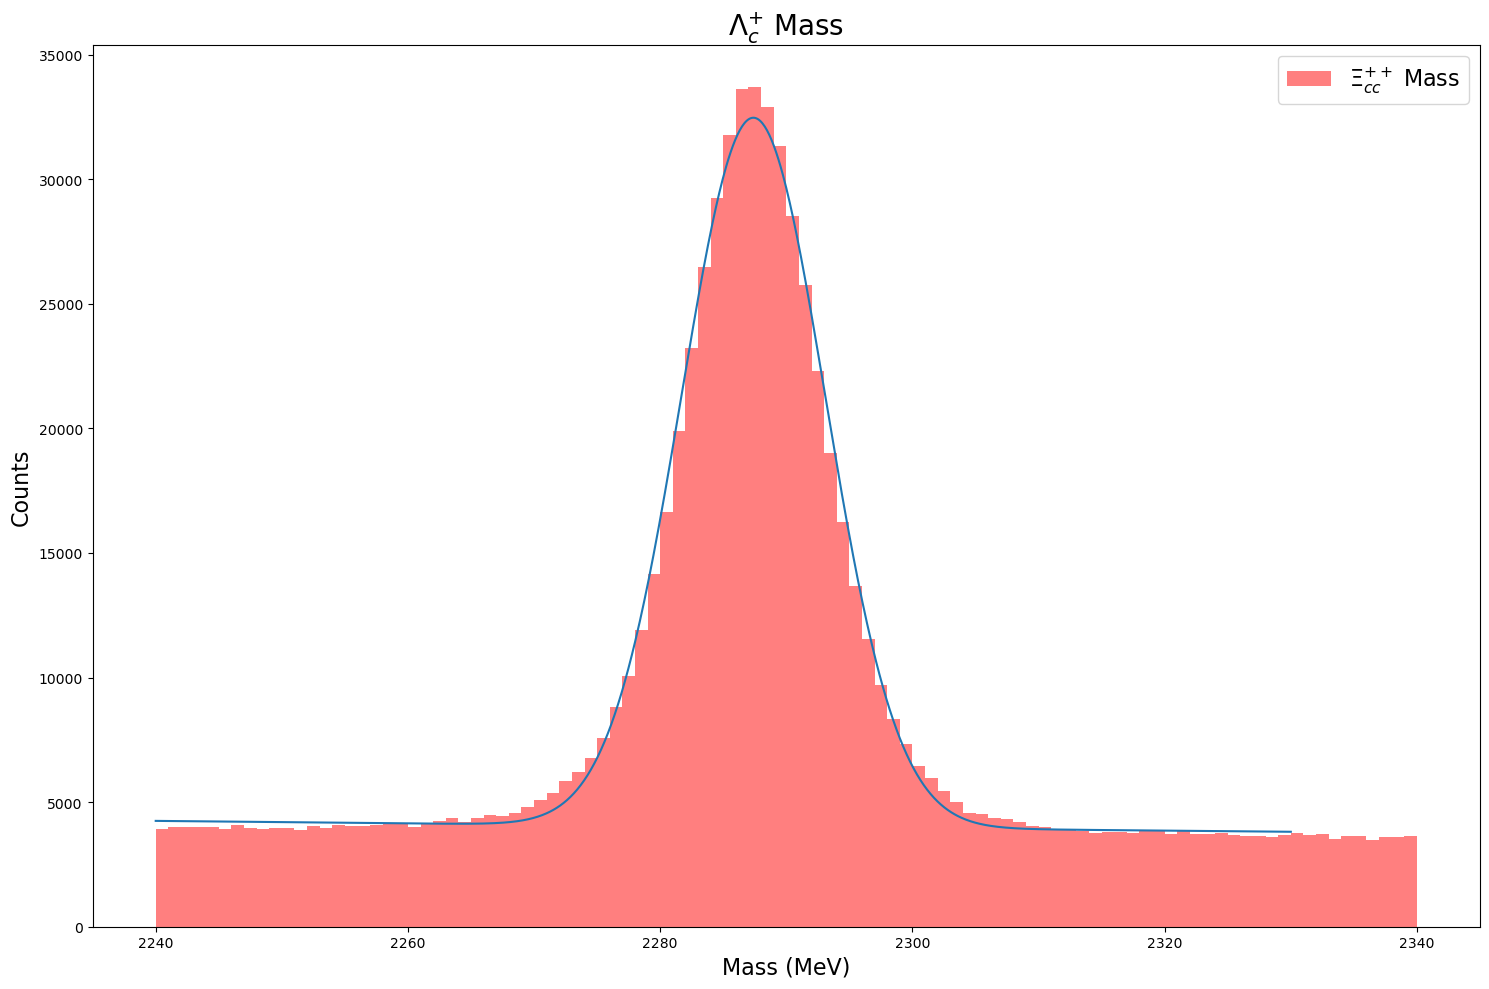

In [43]:
# Producing Extended Unbinned Fit and Save:

fig, axs = plt.subplots(figsize=(15, 10))
axs.hist(pts2, bins=100, color = 'red', alpha=0.5, label= '$\Xi_{cc}^{++}$ Mass')
axs.plot(x_values, signal_part+background_part)
axs.set_title('$\Lambda_{c}^{+}$ Mass', fontsize=20)
axs.set_xlabel('Mass (MeV)', fontsize=16)
axs.set_ylabel('Counts', fontsize=16)

axs.legend(fontsize=16)


plt.tight_layout()
plt.show()

In [64]:
i=6
# Gaussian for signal and Exponential for background:
def density(x, s, b, mu, sigma, tau):
    return s + b, (s * truncnorm.pdf(x, *xr2, mu + xr2[0], sigma) +
        b * truncexpon.pdf(x, *xr2, xr2[0], tau))

c2 = cost.ExtendedUnbinnedNLL(pts_list_Lc[i], density)

m2 = Minuit(c2, s = (Signal_integral/len(pts2)) * len(pts_list_Lc[i]), b = (Background_integral/len(pts2)) * len(pts_list_Lc[i]), mu = mu, sigma = sigma, tau = tau)
m2.limits["s", "b", "sigma", "tau"] = (0, None)
m2.limits["mu"] = (0, xr2[1] - xr2[0])
m2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.258e+06                 │              Nfcn = 107              │
│ EDM = 3.83e-05 (Goal: 0.0002)    │            time = 1.0 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s     │  47.93e3  │  0.28e3   │            │            │    0    │         │       │
│ 1 │ b     │  52.86e3  │  0.28e3   │            │            │    0    │         │       │
│ 2 │ mu    │  47.552   │   0.035   │            │            │    0    │   100   │       │
│ 3 │ sigma │   5.736   │   0.034   │            │            │    0    │         │       │
│ 4 │ tau   │  1.09e3   │  0.18e3   │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────┐
│       │        s        b       mu    sigma      tau │
├───────┼──────────────────────────────────────────────┤
│     s │ 7.59e+04  -0.03e6  -0.0854   3.2966  0.001e6 │
│     b │  -0.03e6 8.06e+04   0.0849  -3.2875 -0.001e6 │
│    mu │  -0.0854   0.0849   0.0012  -0.0000  -0.6740 │
│ sigma │   3.2966  -3.2875  -0.0000  0.00114   0.1628 │
│   tau │  0.001e6 -0.001e6  -0.6740   0.1628 3.31e+04 │
└───────┴──────────────────────────────────────────────┘

In [65]:
len(pts_list_Lc[i])-50

100740

In [ ]:
mu = 47.392726944255664

sigma = 5.711241844212832

tau = 829.4099531241815

47.392726944255664

In [66]:
i=1
# Gaussian for signal and Exponential for background:
def density(x, s, b, m1, m2, sigma1, sigma2, tau):
    return s+b, (s * crystalball_ex.pdf(x, 
                                  beta_left=1.3, 
                                  m_left=m1, 
                                  beta_right=1.3, 
                                  m_right=m2, 
                                  loc= mu + xr2[0], 
                                  scale_left=sigma1, 
                                  scale_right=sigma2) + b * truncexpon.pdf(x, *xr2, xr2[0], tau))

c2 = cost.ExtendedUnbinnedNLL(pts_list_Lc[i], density)


sig = init_list_Lc[i]

# for sig in np.linspace(50, 200, num=20):

m2 = Minuit(c2, 
            s = sig+100,
            b = len(pts_list_Lc[i])-sig+100,
            sigma1 = sigma,
            sigma2 = sigma,
            m1 = 2,
            m2 = 2,
            tau = tau)
m2.limits["s", "b", "tau"] = (0, None)
m2.limits["sigma1", "sigma2"] = (0, 2 * sigma)

m2.limits["m1", "m2"] = (1, None)

m2.migrad()
    # m2.interactive()
    # if result.fmin.is_valid:
    #     print(f"Fit with sig={sig} succeeded.")
    # else:
    #     print(f"Fit with sig={sig} failed.")
 

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.237e+06                 │              Nfcn = 490              │
│ EDM = 0.00163 (Goal: 0.0002)     │            time = 6.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s      │ 54.7945e3 │ 0.0020e3  │            │            │    0    │         │       │
│ 1 │ b      │ 43.5176e3 │ 0.0020e3  │            │            │    0    │         │       │
│ 2 │ m1     │   143.6   │    2.0    │            │            │    1    │         │       │
│ 3 │ m2     │   143.8   │    2.0    │            │            │    1    │         │       │
│ 4 │ sigma1 │   5.40    │   0.04    │            │            │    0    │ 11.4225 │       │
│ 5 │ sigma2 │   5.298   │   0.035   │            │            │    0    │ 11.4225 │       │
│ 6 │ tau    │616.8973e3 │ 0.0020e3  │            │            │    0    │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────┐
│        │       s       b      m1      m2  sigma1  sigma2     tau │
├────────┼─────────────────────────────────────────────────────────┤
│      s │       4      -0      -0      -0  0.0001  0.0001      -0 │
│      b │      -0       4       0       0 -0.0001 -0.0001      -0 │
│     m1 │      -0       0       4      -0  0.0002  0.0001      -0 │
│     m2 │      -0       0      -0       4  0.0001  0.0003       0 │
│ sigma1 │  0.0001 -0.0001  0.0002  0.0001 0.00129  0.0003 -0.0000 │
│ sigma2 │  0.0001 -0.0001  0.0001  0.0003  0.0003 0.00122 -0.0000 │
│    tau │      -0      -0      -0       0 -0.0000 -0.0000       4 │
└────────┴─────────────────────────────────────────────────────────┘

In [67]:
m2.errors["s"]

1.9997682534449268

In [68]:
# Joint fit with shared parameters:
from iminuit.cost import ExtendedUnbinnedNLL
from iminuit.util import describe

# Crystal Ball function for signal and Exponential for background:
def density1(x, s1, b1, mL1, mR1, sigmaL1, sigmaR1, tau1):
    return s1+b1, (s1 * crystalball_ex.pdf(x, 
                                  beta_left=1.3, 
                                  m_left=mL1, 
                                  beta_right=1.3, 
                                  m_right=mR1, 
                                  loc=mu + xr2[0], 
                                  scale_left=sigmaL1, 
                                  scale_right=sigmaR1) + b1 * truncexpon.pdf(x, *xr2, xr2[0], tau1))

def density2(x, s2, b2, mL2, mR2, sigmaL2, sigmaR2, tau2):
    return s2+b2, (s2 * crystalball_ex.pdf(x, 
                                  beta_left=1.3, 
                                  m_left=mL2, 
                                  beta_right=1.3, 
                                  m_right=mR2, 
                                  loc=mu + xr2[0], 
                                  scale_left=sigmaL2, 
                                  scale_right=sigmaR2) + b2 * truncexpon.pdf(x, *xr2, xr2[0], tau2))

def density3(x, s3, b3, mL3, mR3, sigmaL3, sigmaR3, tau3):
    return s3+b3, (s3 * crystalball_ex.pdf(x, 
                                  beta_left=1.3, 
                                  m_left=mL3, 
                                  beta_right=1.3, 
                                  m_right=mR3, 
                                  loc=mu + xr2[0], 
                                  scale_left=sigmaL3, 
                                  scale_right=sigmaR3) + b3 * truncexpon.pdf(x, *xr2, xr2[0], tau3))

def density4(x, s4, b4, mL4, mR4, sigmaL4, sigmaR4, tau4):
    return s4+b4, (s4 * crystalball_ex.pdf(x, 
                                  beta_left=1.3, 
                                  m_left=mL4, 
                                  beta_right=1.3, 
                                  m_right=mR4, 
                                  loc=mu + xr2[0], 
                                  scale_left=sigmaL4, 
                                  scale_right=sigmaR4) + b4 * truncexpon.pdf(x, *xr2, xr2[0], tau4))

def density5(x, s5, b5, mL5, mR5, sigmaL5, sigmaR5, tau5):
    return s5+b5, (s5 * crystalball_ex.pdf(x, 
                                  beta_left=1.3, 
                                  m_left=mL5, 
                                  beta_right=1.3, 
                                  m_right=mR5, 
                                  loc=mu + xr2[0], 
                                  scale_left=sigmaL5, 
                                  scale_right=sigmaR5) + b5 * truncexpon.pdf(x, *xr2, xr2[0], tau5))

def density6(x, s6, b6, mL6, mR6, sigmaL6, sigmaR6, tau6):
    return s6+b6, (s6 * crystalball_ex.pdf(x, 
                                  beta_left=1.3, 
                                  m_left=mL6, 
                                  beta_right=1.3, 
                                  m_right=mR6, 
                                  loc=mu + xr2[0], 
                                  scale_left=sigmaL6, 
                                  scale_right=sigmaR6) + b6 * truncexpon.pdf(x, *xr2, xr2[0], tau6))

def density7(x, s7, b7, mL7, mR7, sigmaL7, sigmaR7, tau7):
    return s7+b7, (s7 * crystalball_ex.pdf(x, 
                                  beta_left=1.3, 
                                  m_left=mL7, 
                                  beta_right=1.3, 
                                  m_right=mR7, 
                                  loc=mu + xr2[0], 
                                  scale_left=sigmaL7, 
                                  scale_right=sigmaR7) + b7 * truncexpon.pdf(x, *xr2, xr2[0], tau7))

# combine two log-likelihood functions by adding them
lh = (ExtendedUnbinnedNLL(pts_list_Lc[0], density1) 
      + ExtendedUnbinnedNLL(pts_list_Lc[1], density2)
      + ExtendedUnbinnedNLL(pts_list_Lc[2], density3)
      + ExtendedUnbinnedNLL(pts_list_Lc[3], density4)
      + ExtendedUnbinnedNLL(pts_list_Lc[4], density5)
      + ExtendedUnbinnedNLL(pts_list_Lc[5], density6)
      + ExtendedUnbinnedNLL(pts_list_Lc[6], density7))

print(f"{describe(lh)=}")

describe(lh)=['s1', 'b1', 'mL1', 'mR1', 'sigmaL1', 'sigmaR1', 'tau1', 's2', 'b2', 'mL2', 'mR2', 'sigmaL2', 'sigmaR2', 'tau2', 's3', 'b3', 'mL3', 'mR3', 'sigmaL3', 'sigmaR3', 'tau3', 's4', 'b4', 'mL4', 'mR4', 'sigmaL4', 'sigmaR4', 'tau4', 's5', 'b5', 'mL5', 'mR5', 'sigmaL5', 'sigmaR5', 'tau5', 's6', 'b6', 'mL6', 'mR6', 'sigmaL6', 'sigmaR6', 'tau6', 's7', 'b7', 'mL7', 'mR7', 'sigmaL7', 'sigmaR7', 'tau7']


In [69]:
# m2 = Minuit(lh, 
#             s1 = 55, 
#            s2 = 57216.08040201005, 
#            s3 = 54643.21608040201,
#            s4 = 85311.55778894473, 
#            s5 = 63000, 
#            s6 = 63000, 
#            s7 = 63000,

#            b1 = 106616, 
#            b2 = 41101.91959798995, 
#            b3 = 68765.78391959799, 
#            b4 = 44176.44221105527, 
#            b5 = 53195, 
#            b6 = 27182, 
#            b7 = 37790,

#            sigmaL1 = sigma,
#            sigmaR1= sigma,
#            sigmaL2 = sigma,
#            sigmaR2 = sigma,
#            sigmaL3 = sigma,
#            sigmaR3 = sigma,
#            sigmaL4 = sigma,
#            sigmaR4 = sigma,
#            sigmaL5 = sigma,
#            sigmaR5 = sigma,
#            sigmaL6 = sigma,
#            sigmaR6 = sigma,
#            sigmaL7 = sigma,
#            sigmaR7 = sigma,

#            mL1 = 2,
#            mR1 = 2,
#            mL2 = 2,
#            mR2 = 2,
#            mL3 = 2,
#            mR3 = 2,
#            mL4 = 2,
#            mR4 = 2,
#            mL5 = 2,
#            mR5 = 2,
#            mL6 = 2,
#            mR6 = 2,
#            mL7 = 2,
#            mR7 = 2,
           
#            tau1 = tau,
#            tau2 = tau,
#            tau3 = tau,
#            tau4 = tau,
#            tau5 = tau,
#            tau6 = tau,
#            tau7 = tau)

# m2.limits["s1", "s2", "s3", "s4", "s5", "s6", "s7",
#           "b1", "b2", "b3", "b4", "b5", "b6", "b7",
#           "tau1", "tau2", "tau3", "tau4", "tau5", "tau6", "tau7"] = (0, None)
# m2.limits["sigmaL1", "sigmaL2", "sigmaL3", "sigmaL4", "sigmaL5", "sigmaL6", "sigmaL7", 
#           "sigmaR1", "sigmaR2", "sigmaR3", "sigmaR4", "sigmaR5", "sigmaR6", "sigmaR7",] = (0, 2 * sigma)
# m2.limits["mL1", "mL2", "mL3", "mL4", "mL5", "mL6", "mL7",
#           "mR1", "mR2", "mR3", "mR4", "mR5", "mR6", "mR7"] = (1, None)
# m2.migrad()
# # m2.interactive()

In [44]:
# To initialise Lc fit:

s1 = 50
s2 = 57216.08040201005
s3 = 54643.21608040201
s4 = 85311.55778894473
s5 = 63000
s6 = 63000
s7 = 63000

b1 = 89797
b2 = 41101.91959798995
b3 = 68765.78391959799
b4 = 44176.44221105527
b5 = 53195
b6 = 27182
b7 = 37790

init_list_Lc = [s1,s2,s3,s4,s5,s6,s7]

In [45]:
# Fits for ndof for Lc:
results_Lc = []
for i, sig in enumerate(init_list_Lc):
    # Gaussian for signal and Exponential for background:
    def density(x, s, b, m1, m2, sigma1, sigma2, tau):
        return s+b, (s * crystalball_ex.pdf(x, 
                                    beta_left=1.3, 
                                    m_left=m1, 
                                    beta_right=1.3, 
                                    m_right=m2, 
                                    loc= mu + xr2[0], 
                                    scale_left=sigma1, 
                                    scale_right=sigma2) + b * truncexpon.pdf(x, *xr2, xr2[0], tau))

    c2 = cost.ExtendedUnbinnedNLL(pts_list_Lc[i], density)

    m2 = Minuit(c2, 
                s = sig,
                b = len(pts_list_Lc[i])-sig,
                sigma1 = sigma,
                sigma2 = sigma,
                m1 = 2,
                m2 = 2,
                tau = tau)
    m2.limits["s", "b", "tau"] = (0, None)
    m2.limits["sigma1", "sigma2"] = (0, 2 * sigma)

    m2.limits["m1", "m2"] = (1, None)

    result = m2.migrad()
    if result.fmin.is_valid:
        print(f"Fit with sig={sig} succeeded.")
    else:
        print(f"Fit with sig={sig} failed.")
    results_Lc.append(m2)
 

Fit with sig=50 succeeded.
Fit with sig=57216.08040201005 succeeded.
Fit with sig=54643.21608040201 succeeded.
Fit with sig=85311.55778894473 succeeded.
Fit with sig=63000 succeeded.
Fit with sig=63000 succeeded.
Fit with sig=63000 succeeded.


In [46]:
xr2[1] - xr2[0]

100

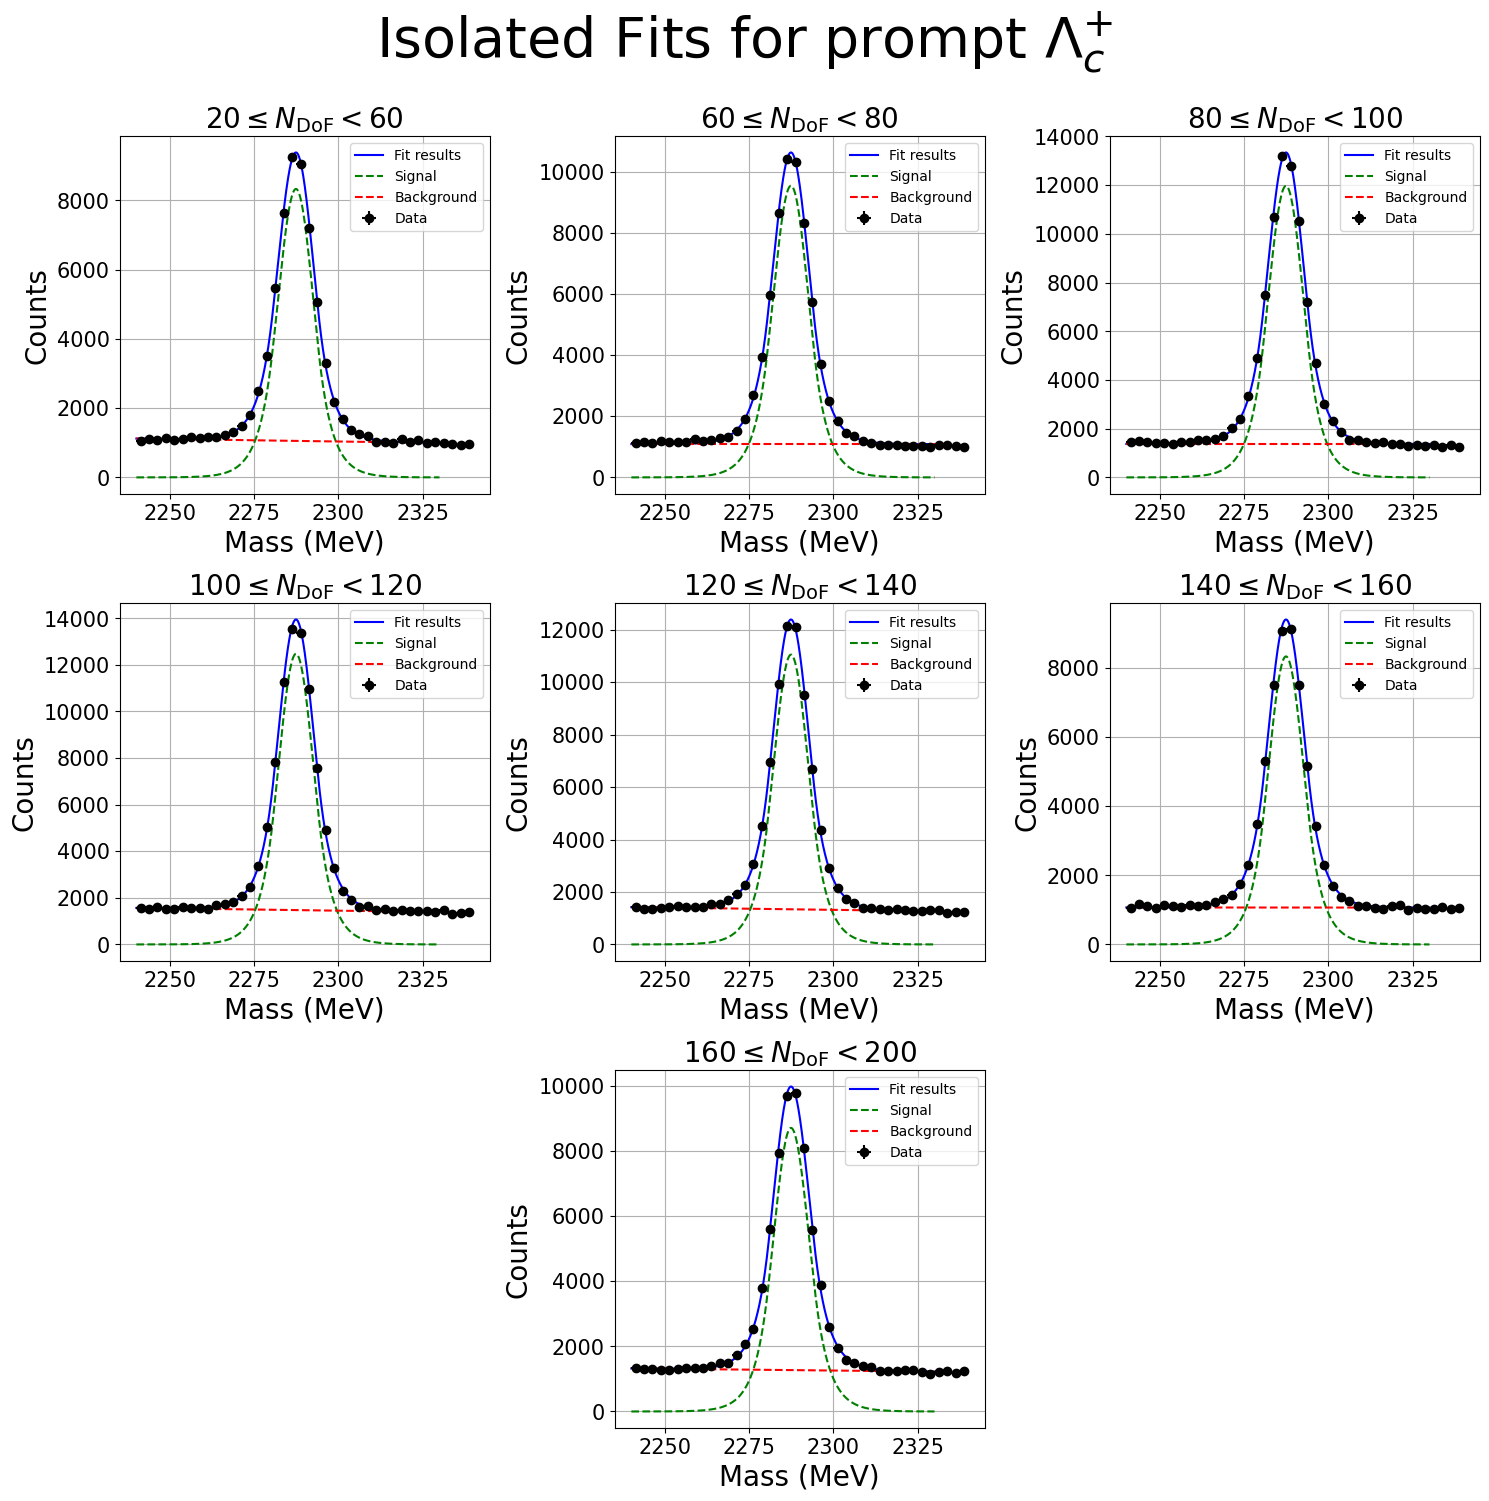

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Assuming results.values, xr, and other necessary variables are defined above this code

fig = plt.figure(figsize=(15, 20))  # Adjust the size as needed
gs = GridSpec(4, 3, figure=fig)
fig.suptitle('Isolated Fits for prompt $\Lambda_{c}^{+}$', fontsize=40)

# Generate x values for plotting:
x_values = np.linspace(xr2[0], xr2[1]-10, 1000)  # Truncated as it would go to 0 at xr[1]

# Indices of the axes to populate (leaving the center of the last row empty)
indices_to_populate = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 1)]

for i, results in enumerate(results_Lc):
    row, col = indices_to_populate[i]
    ax = fig.add_subplot(gs[row, col])

    # Evaluate just the signal part:
    signal_part = (2.5)*(len(pts_list_Lc[i])/(results.values['s'] + results.values['b'])) * results.values['s'] * crystalball_ex.pdf(x_values,
                                                           beta_left=1.3,
                                                           m_left=results.values['m1'],
                                                           beta_right=1.3,
                                                           m_right=results.values['m2'],
                                                           loc=mu+ xr2[0],
                                                           scale_left=results.values['sigma1'],
                                                           scale_right=results.values['sigma2'])

    # Evaluate just the background part:
    background_part = (2.5)*(len(pts_list_Lc[i])/(results.values['s'] + results.values['b'])) * results.values['b'] * truncexpon.pdf(x_values, *xr2, xr2[0], results.values['tau'])

    # Plotting
    ax.plot(x_values, signal_part + background_part, 'b-', label= "Fit results")

    ax.plot(x_values, signal_part, 'g--', label='Signal')
    ax.plot(x_values, background_part, 'r--', label='Background')

    # Calculate histogram data
    counts, bin_edges = np.histogram(pts_list_Lc[i], bins=40)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_widths = (-bin_edges[:-1] + bin_edges[1:]) / 2
    y_err = np.sqrt(counts)
    
    # Plot midpoints with error bars
    ax.errorbar(bin_centers, counts, xerr= bin_widths,  yerr=y_err, fmt='o', color='black', label="Data")


    ax.set_xlabel('Mass (MeV)', fontsize=20)
    ax.set_ylabel('Counts', fontsize=20)
    ax.legend(fontsize=10)
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=15)

    ax.set_title(f"${dof_ranges[i][0]} \leq N_{{\mathrm{{DoF}}}} < {dof_ranges[i][1]}$", fontsize=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig('/home/bonacci/Results/Isolated_fits_Lc.pdf')
plt.show()


In [48]:
# Signal (and error) of Lc:
signal_Lc = []
signal_Lc_err = []

for results in results_Lc:
    signal_Lc.append(results.values['s'])
    signal_Lc_err.append(results.errors['s'])

In [49]:
signal_Lc

[47793.00995797374,
 54794.54019888824,
 68545.49445903792,
 70746.1734881103,
 62741.74847874002,
 47464.37612395696,
 50100.309991126596]

In [50]:
signal_Lc_err

[294.15904655183476,
 1.9997691505996045,
 1.9993022700873553,
 1.9967236985030468,
 1.999844273654162,
 1.9998541525710607,
 1.9995097272731073]

$\sigma_R=R \sqrt{\left(\frac{\sigma_a}{a}\right)^2+\left(\frac{\sigma_b}{b}\right)^2}$ for $R = \frac{a}{b}$

In [51]:
# Yields of Xicc and Lc:

Xicc_yields = np.array(signal_Xicc)
Xicc_yields_err = np.array(signal_Xicc_err)

Lc_yields = np.array(signal_Lc)
Lc_yields_err = np.array(signal_Lc_err)

# Calculate Ratio (and error):
counts = Xicc_yields/Lc_yields * (1000000/218824926)

dof_list = [(start + end) / 2 for start, end in dof_ranges]
dof_errors = [(end-start) / 2 for start, end in dof_ranges]

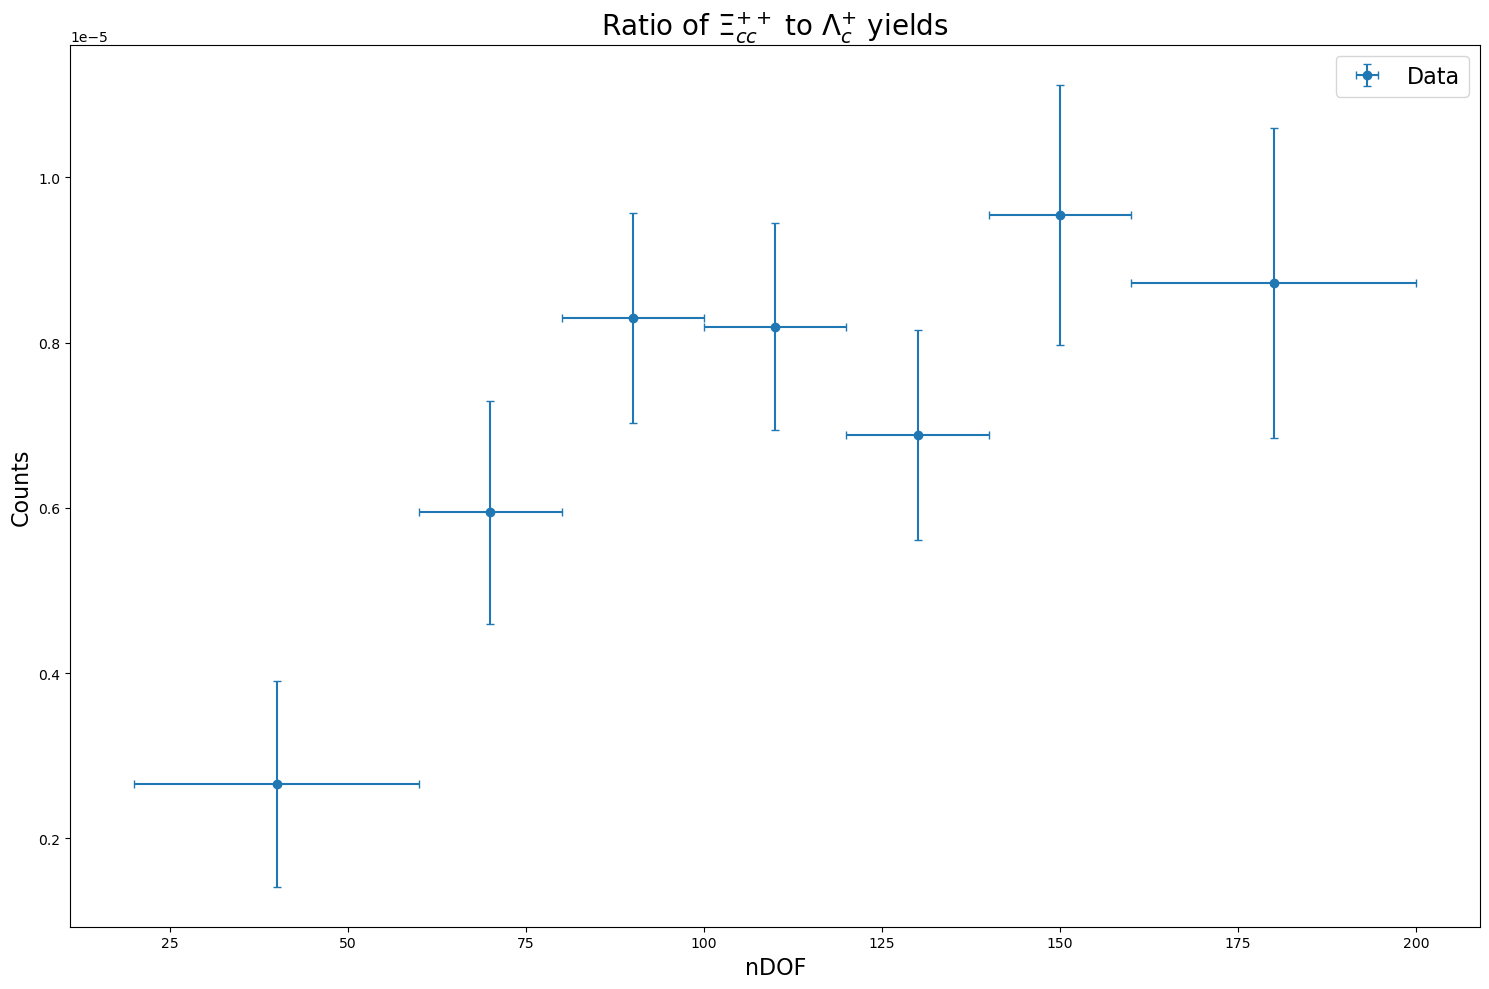

In [52]:
import numpy as np
import matplotlib.pyplot as plt

x_errors = dof_errors

ratio_err = counts * np.sqrt(((Xicc_yields_err/Xicc_yields)**2 + ((Lc_yields_err)/Lc_yields)**2))
# ratio_err = counts * np.sqrt((((Xicc_yields_err + np.sqrt(Xicc_yields))/Xicc_yields)**2 + ((Lc_yields_err + np.sqrt(Lc_yields))/Lc_yields)**2))


fig, axs = plt.subplots(figsize=(15, 10))
axs.errorbar(dof_list, counts, xerr=x_errors, yerr=ratio_err, fmt='o', capsize=3, label="Data")
axs.set_title('Ratio of $\Xi_{cc}^{++}$ to $\Lambda_{c}^{+}$ yields', fontsize=20)
axs.set_xlabel('nDOF', fontsize=16)
axs.set_ylabel('Counts', fontsize=16)

axs.legend(fontsize=16)

plt.tight_layout()
plt.show()


In [53]:
# Specify fit data:

x = dof_list
y = counts
x_err = x_errors
y_err = ratio_err

x = np.array(x, dtype=np.float64)
y = np.array(y, dtype=np.float64)
x_err = np.array(x_err, dtype=np.float64)
y_err = np.array(y_err, dtype=np.float64)

In [54]:
print(x, y, x_err, y_err)

[ 40.  70.  90. 110. 130. 150. 180.] [2.65841553e-06 5.94456048e-06 8.30149604e-06 8.19324301e-06
 6.88055325e-06 9.54514666e-06 8.72083538e-06] [20. 10. 10. 10. 10. 10. 20.] [1.24269279e-06 1.35140400e-06 1.27089159e-06 1.25375399e-06
 1.27626910e-06 1.57214594e-06 1.87417498e-06]


In [55]:
# Initial linear algebra method to form inital guess for optimiser

Y = np.atleast_2d(y).T

A = np.vstack([np.ones_like(x), x]).T

# Based on what the question says we have some homoscedastic noise, which seems to be constant throughout, hence 
# just start with y_err=1 uncertainty for all points:
C = np.diag(y_err) 

C_inv = np.linalg.inv(C)
G = np.linalg.inv(A.T @ C_inv @ A)
# Initial guess:
X = G @ (A.T @ C_inv @ Y)

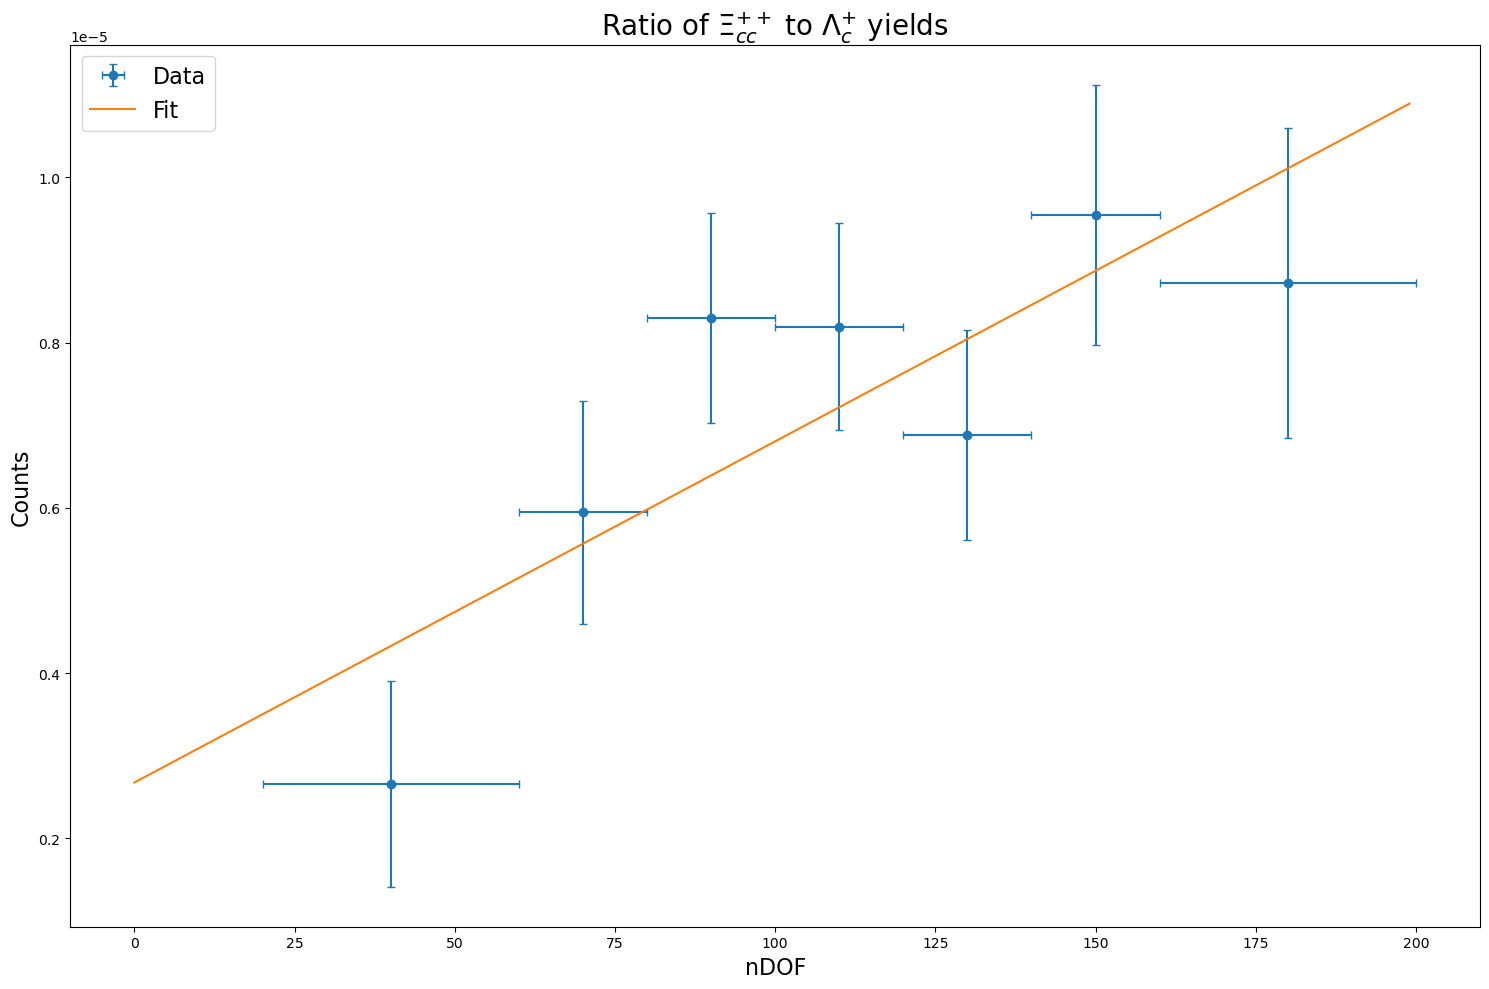

In [56]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(15, 10))
axs.errorbar(dof_list, counts, xerr=x_errors, yerr=ratio_err, fmt='o', capsize=3, label="Data")
axs.errorbar(np.arange(0,200), X[1] * np.arange(0,200) + X[0], label="Fit")
axs.set_title('Ratio of $\Xi_{cc}^{++}$ to $\Lambda_{c}^{+}$ yields', fontsize=20)
axs.set_xlabel('nDOF', fontsize=16)
axs.set_ylabel('Counts', fontsize=16)

axs.legend(fontsize=16)

plt.tight_layout()
plt.show()


In [57]:
# Account of x and y uncertainty in the linear fit:
import scipy.optimize as op

xy_ivar = 1/(x_err**2 + y_err**2)

def ln_prior(theta):
    b, m = theta
    return -3/2 * np.log(1 + m**2)

def ln_likelihood(theta, x, y, xy_ivar):
    b, m = theta
    return -0.5 * np.sum((y - m * x - b)**2 * xy_ivar)

def ln_probability(theta, x, y, xy_ivar):
    return ln_prior(theta) + ln_likelihood(theta, x, y, xy_ivar)

nlp = lambda *args: -ln_probability(*args)

initial_theta = X.T[0]
args = (x, y, xy_ivar)

result = op.minimize(lambda *args: -ln_probability(*args),
                     initial_theta,
                     args=args,
                     method="L-BFGS-B")

In [58]:
result.x

array([2.67615319e-06, 4.12795697e-08])

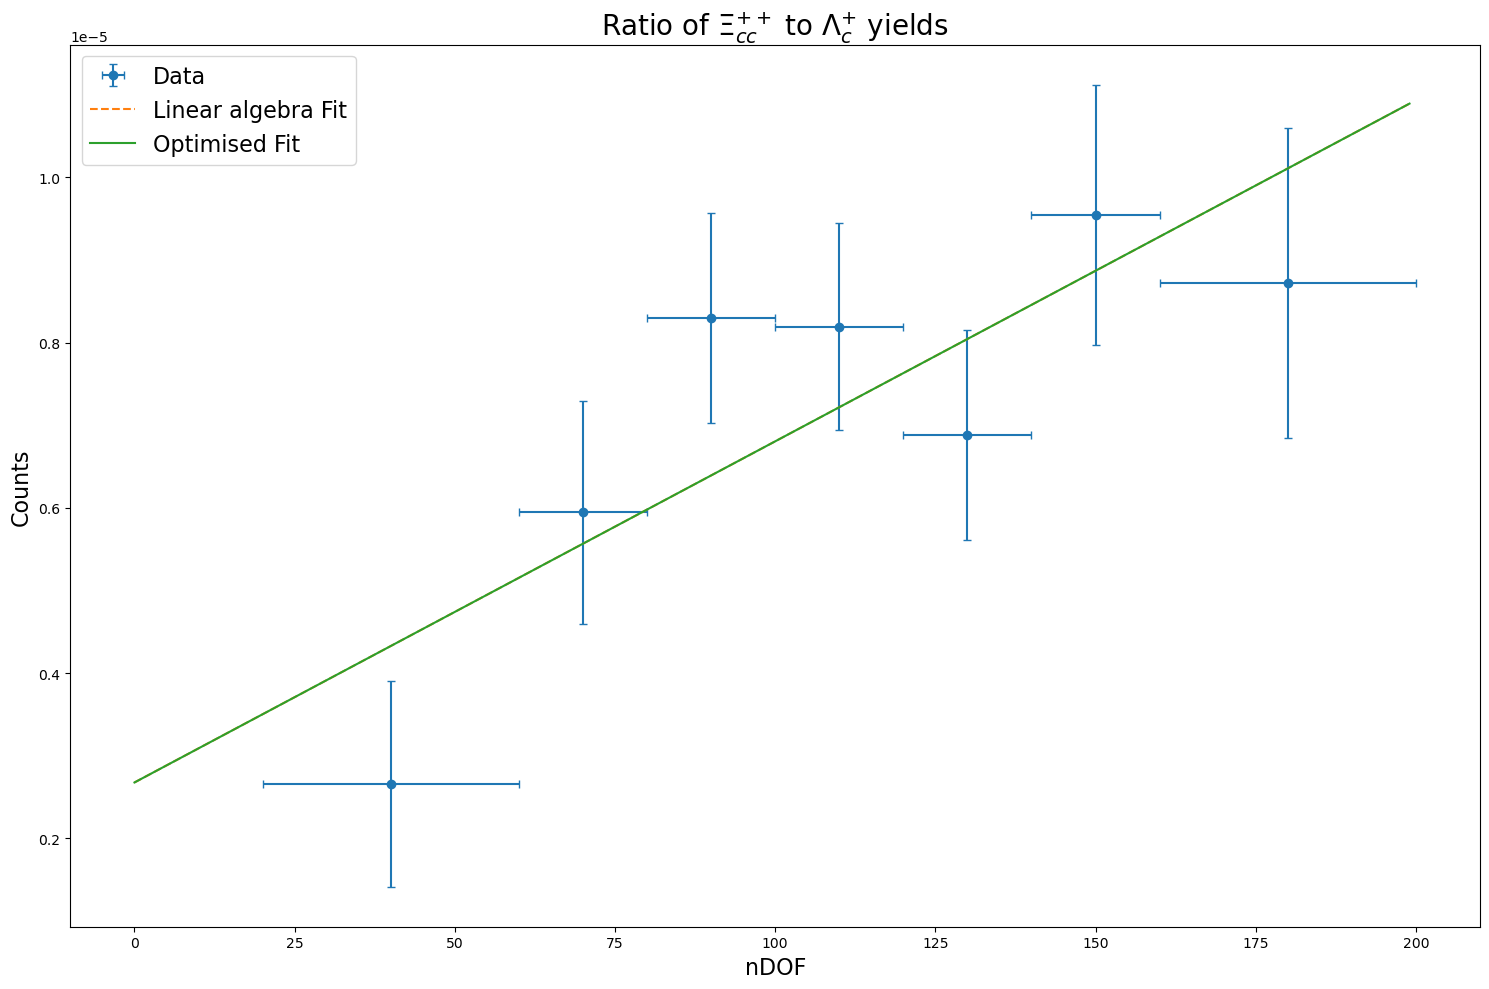

In [59]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(15, 10))
axs.errorbar(dof_list, counts, xerr=x_err, yerr=ratio_err, fmt='o', capsize=3, label="Data")
axs.errorbar(np.arange(0,200), X[1] * np.arange(0,200) + X[0], linestyle = '--', label="Linear algebra Fit")
axs.errorbar(np.arange(0,200), result.x[1] * np.arange(0,200) + result.x[0], label="Optimised Fit")


axs.set_title('Ratio of $\Xi_{cc}^{++}$ to $\Lambda_{c}^{+}$ yields', fontsize=20)
axs.set_xlabel('nDOF', fontsize=16)
axs.set_ylabel('Counts', fontsize=16)

axs.legend(fontsize=16)

plt.tight_layout()
plt.show()


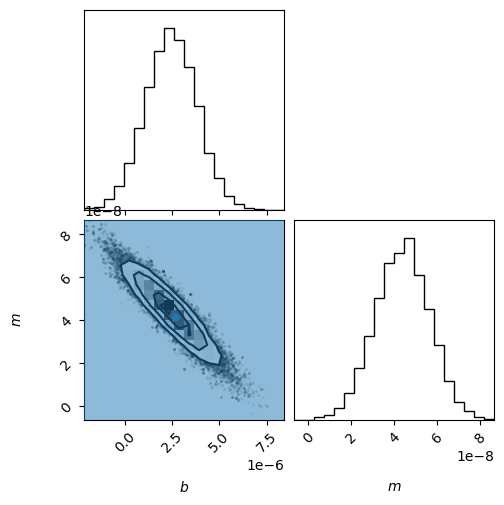

In [60]:
import emcee
from corner import corner
from matplotlib.ticker import MaxNLocator
from matplotlib.patches import Ellipse

# Define the ln-probability function
def ln_prior(theta):
    b, m = theta
    if -1 <= b <= 1 and -1 <= m <= 1:
        return 0.0  # Uniform priors within reasonable ranges
    return -np.inf

def ln_likelihood(theta, x, y, y_err):
    b, m = theta
    model = m * x + b
    chi_squared = np.sum((y - model)**2 / y_err**2)
    return -0.5 * chi_squared

def ln_probability(theta, x, y, y_err):
    prior = ln_prior(theta)
    if not np.isfinite(prior):
        return -np.inf
    return prior + ln_likelihood(theta, x, y, y_err)

# Let's sample the posterior to estimate our uncertainties on the model parameters.
ndim, nwalkers = (result.x.size, 32)
p0 = [result.x + 1e-5 * np.random.randn(ndim) for k in range(nwalkers)]

sampler = emcee.EnsembleSampler(
    nwalkers, 
    ndim,
    ln_probability,
    args=(x, y, y_err)
)

# Run the burn-in.
pos, *_ = sampler.run_mcmc(p0, 2000)
sampler.reset()

# Run production.
sampler.run_mcmc(pos, 1000)

# Make a corner plot.
chain = sampler.chain.reshape((-1, ndim))

fig = corner(
    chain,
    labels=(r"$b$", "$m$")
)

# Add the point estimate we found from optimisation as a red dot.
ax = fig.axes[2]
ax.scatter(*result.x,
           s=20,
           facecolor="tab:red",
           zorder=100)

def _ellipse(x, y, cov, scale=2, facecolor="none", **kwargs):
    vals, vecs = np.linalg.eig(cov)
    theta = np.degrees(np.arctan2(*vecs[::-1, 0]))
    w, h = scale * np.sqrt(vals)

    kwds = dict(lw=0.5)
    kwds.update(**kwargs)

    ellipse = Ellipse(xy=[x, y], 
                        width=w, height=h, angle=theta,
                        **kwds)
    ellipse.set_facecolor(facecolor)

    return ellipse

# Add our linear algebra estimate as a blue point, with contours.
b, m = X.T[0]
ax.scatter([b], [m],
            s=20,
            facecolor="tab:blue",
            zorder=100)
ax.add_artist(_ellipse(*X.T[0], G,
                       scale=3, lw=0, alpha=0.5,
                       facecolor="tab:blue",
                       color="tab:blue",
                       zorder=10))
ax.add_artist(_ellipse(*X.T[0], G,
                       scale=3, lw=2, 
                       facecolor="none",
                       color="tab:blue",
                       zorder=60))

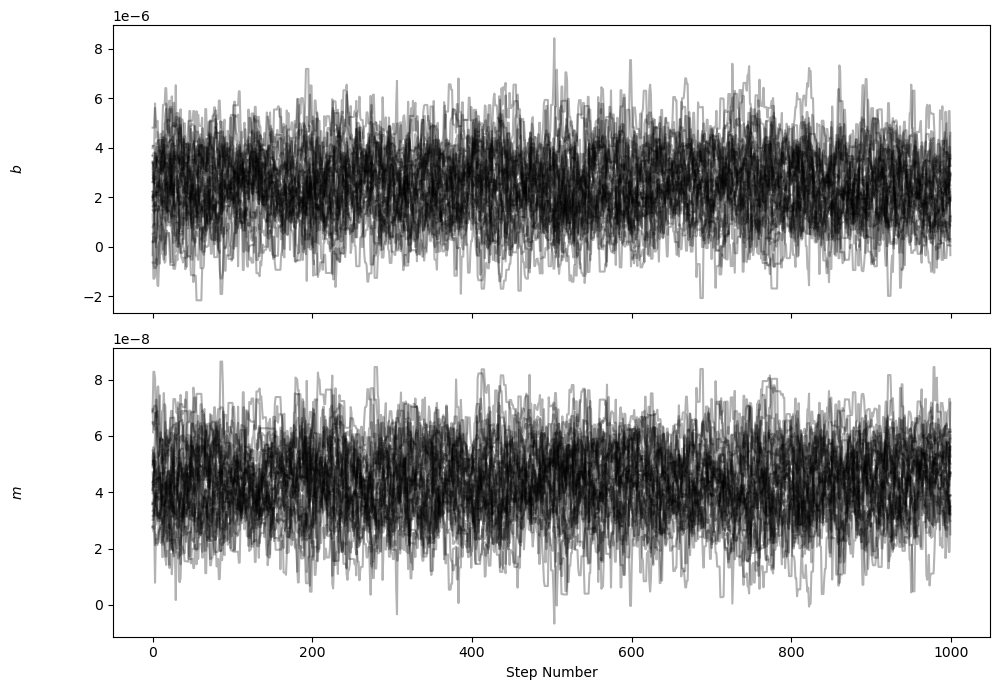

In [64]:
import matplotlib.pyplot as plt

# Get the chain from the sampler
chain = sampler.chain

# Plot the chains for each parameter
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
labels = [r"$b$", r"$m$"]

for i in range(2):
    ax = axes[i]
    ax.plot(chain[:, :, i].T, "k", alpha=0.3)
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("Step Number")
plt.tight_layout()
plt.show()


In [89]:
import numpy as np

# Flatten the chain to combine the samples from all walkers
flat_chain = chain.reshape(-1, ndim)

# Calculate the median and the 95% credible interval for each parameter
for i in range(ndim):
    median = np.median(flat_chain[:, i])
    lower_95 = np.percentile(flat_chain[:, i], 2.5)
    upper_95 = np.percentile(flat_chain[:, i], 97.5)

    print(upper_95-median)

    print(median-lower_95)
    
    print(f"Parameter {labels[i]}:")
    print(f"Median: {median}")
    print(f"95% credible interval: [{lower_95}, {upper_95}]\n")


2.675142886648323e-06
2.686450038561647e-06
Parameter $b$:
Median: 2.447617729956487e-06
95% credible interval: [-2.388323086051602e-07, 5.12276061660481e-06]

2.388872740920896e-08
2.508401319218882e-08
Parameter $m$:
Median: 4.3924980973318835e-08
95% credible interval: [1.8840967781130014e-08, 6.78137083825278e-08]



In [77]:
b_chain = chain[:,:, 0].T  # Chain data for parameter b
m_chain = chain[:,:, 1].T  # Chain data for parameter m


In [79]:
m_chain[0,:]

array([5.24756192e-08, 4.70557583e-08, 6.49701765e-08, 3.58312234e-08,
       4.05341835e-08, 6.96394331e-08, 2.78875276e-08, 6.84093372e-08,
       4.88735210e-08, 5.32899504e-08, 2.75694709e-08, 2.74778836e-08,
       4.09030404e-08, 3.96730105e-08, 4.97136164e-08, 3.34011377e-08,
       3.64196502e-08, 4.33009355e-08, 4.08658681e-08, 4.26094471e-08,
       5.11240626e-08, 3.57585473e-08, 5.01085792e-08, 3.15331433e-08,
       6.44428843e-08, 4.16211007e-08, 5.48613447e-08, 3.02145918e-08,
       3.60858521e-08, 4.35194064e-08, 4.38215238e-08, 6.88752477e-08])

In [81]:
m_chain[:,0]

array([5.24756192e-08, 4.91620634e-08, 4.91620634e-08, 4.30532915e-08,
       4.13363242e-08, 4.61267537e-08, 4.82257031e-08, 4.91852102e-08,
       4.56972905e-08, 4.56972905e-08, 4.29346037e-08, 4.26507079e-08,
       4.26507079e-08, 4.18617288e-08, 4.18617288e-08, 4.05962779e-08,
       4.14214346e-08, 4.14214346e-08, 4.14214346e-08, 4.75663448e-08,
       4.75730087e-08, 4.10783748e-08, 4.60869973e-08, 4.40714152e-08,
       3.12895299e-08, 3.16415492e-08, 3.30361623e-08, 4.18603271e-08,
       4.18603271e-08, 4.20162013e-08, 4.32072264e-08, 4.02995764e-08,
       4.02995764e-08, 3.69786188e-08, 3.46653171e-08, 3.46653171e-08,
       2.96302921e-08, 3.38126288e-08, 3.40799397e-08, 3.40799397e-08,
       3.51858116e-08, 3.61659509e-08, 3.61659509e-08, 3.81893014e-08,
       3.94211369e-08, 4.17295649e-08, 3.44720073e-08, 3.17010300e-08,
       3.25754450e-08, 3.14523031e-08, 3.43717757e-08, 3.60294323e-08,
       3.47401606e-08, 3.42830347e-08, 3.03138492e-08, 3.03138492e-08,
      

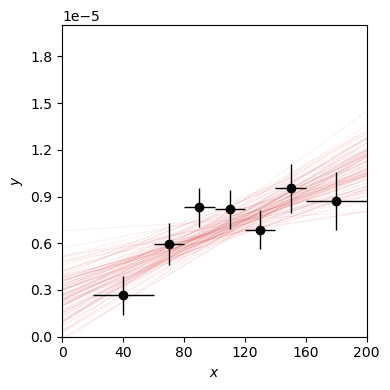

In [62]:
fig, ax = plt.subplots(figsize=(4, 4))        
ax.scatter(x, y, c="k", s=10)
ax.errorbar(x, y,
            xerr=x_err, yerr=y_err, 
            fmt="o", lw=1, c="k")

xlim = np.array([0, 200])
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
    
ax.xaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_major_locator(MaxNLocator(7))
    
# Plot draws of the posterior.
for index in np.random.choice(chain.shape[0], size=100):
    b, m = chain[index][np.random.choice(1000)]
    ax.plot(
        xlim,
        m * xlim + b,
        "-",
        c="tab:red",
        alpha=0.1,
        lw=0.5,
        zorder=-1
    )

ax.set_xlim(*xlim)
ax.set_ylim(0, .00002)        
fig.tight_layout()

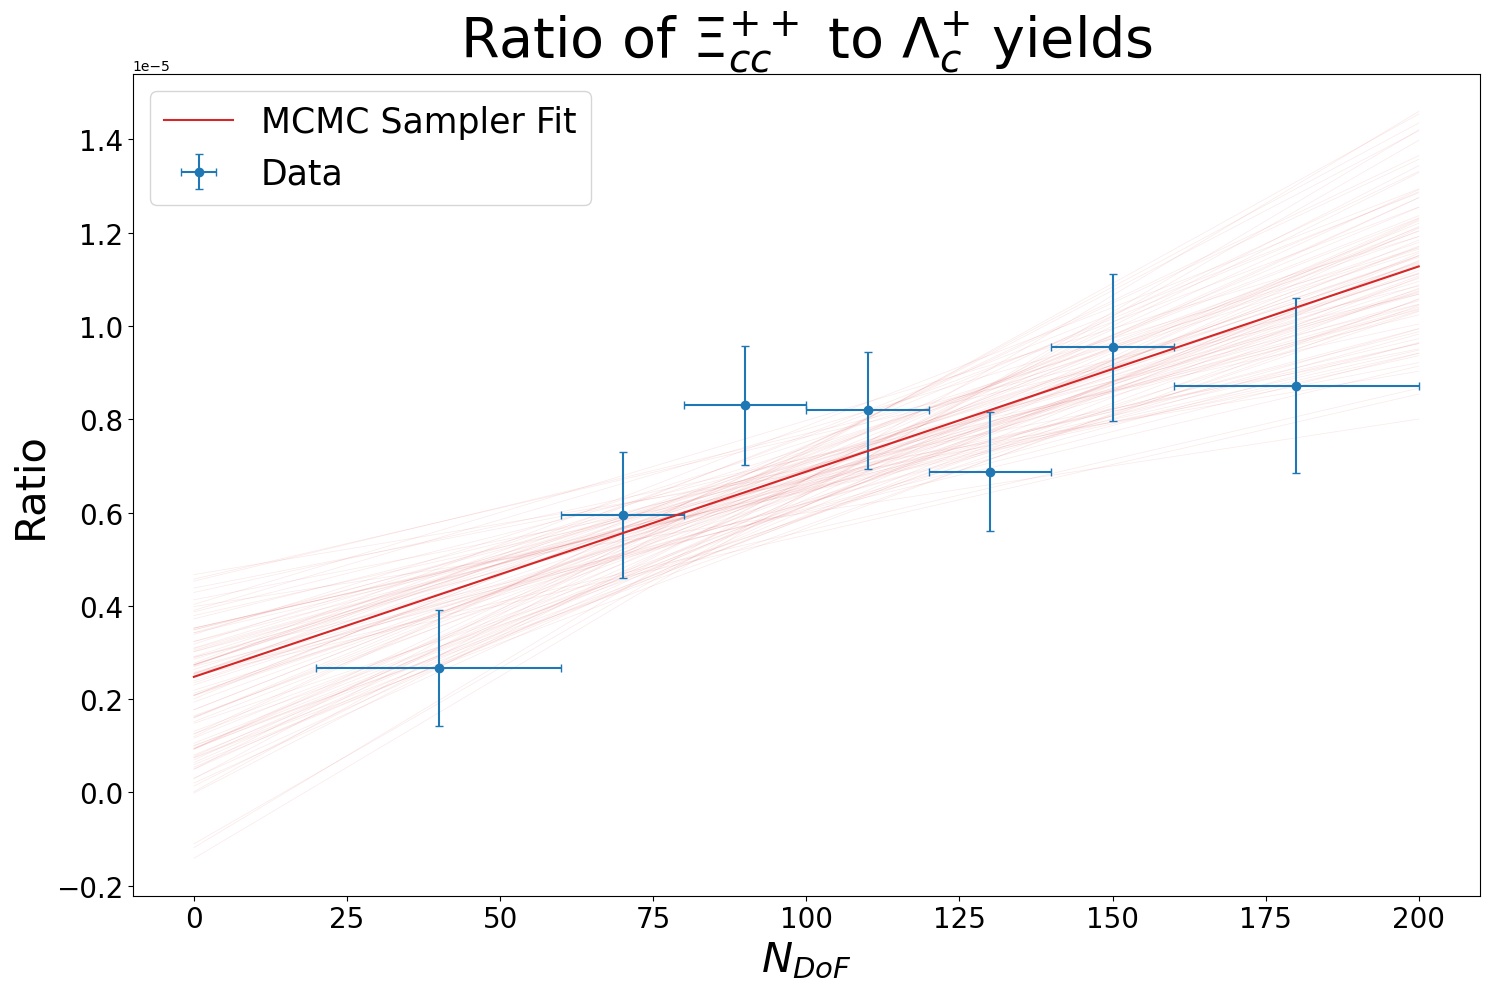

In [88]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(15, 10))
axs.errorbar(dof_list, counts, xerr=x_err, yerr=ratio_err, fmt='o', capsize=3, label="Data")
# axs.errorbar(np.arange(0,200), X[1] * np.arange(0,200) + X[0], linestyle = '--', label="Linear algebra Fit")
# axs.errorbar(np.arange(0,200), result.x[1] * np.arange(0,200) + result.x[0], label="Optimised Fit")

# Plot draws of the posterior.
for index in np.random.choice(chain.shape[0], size=100):
    b, m = chain[index][np.random.choice(1000)]
    axs.plot(
        xlim,
        m * xlim + b,
        "-",
        c="tab:red",
        alpha=0.1,
        lw=0.5,
        zorder=-1
    )


np.mean(chain[index], axis = 0)

axs.plot(
    xlim,
    np.mean(chain[4], axis = 0)[1] * xlim + np.mean(chain[4], axis = 0)[0],
    "-",
    c="tab:red",
    label = "MCMC Sampler Fit"
)


axs.set_title('Ratio of $\Xi_{cc}^{++}$ to $\Lambda_{c}^{+}$ yields', fontsize=40)
axs.set_xlabel('$N_{DoF}$', fontsize=30)
axs.set_ylabel('Ratio', fontsize=30)
axs.tick_params(axis='both', which='major', labelsize=20)

axs.legend(fontsize=25)

plt.tight_layout()
plt.savefig('/home/bonacci/Results/Final_ratio.pdf')
plt.show()

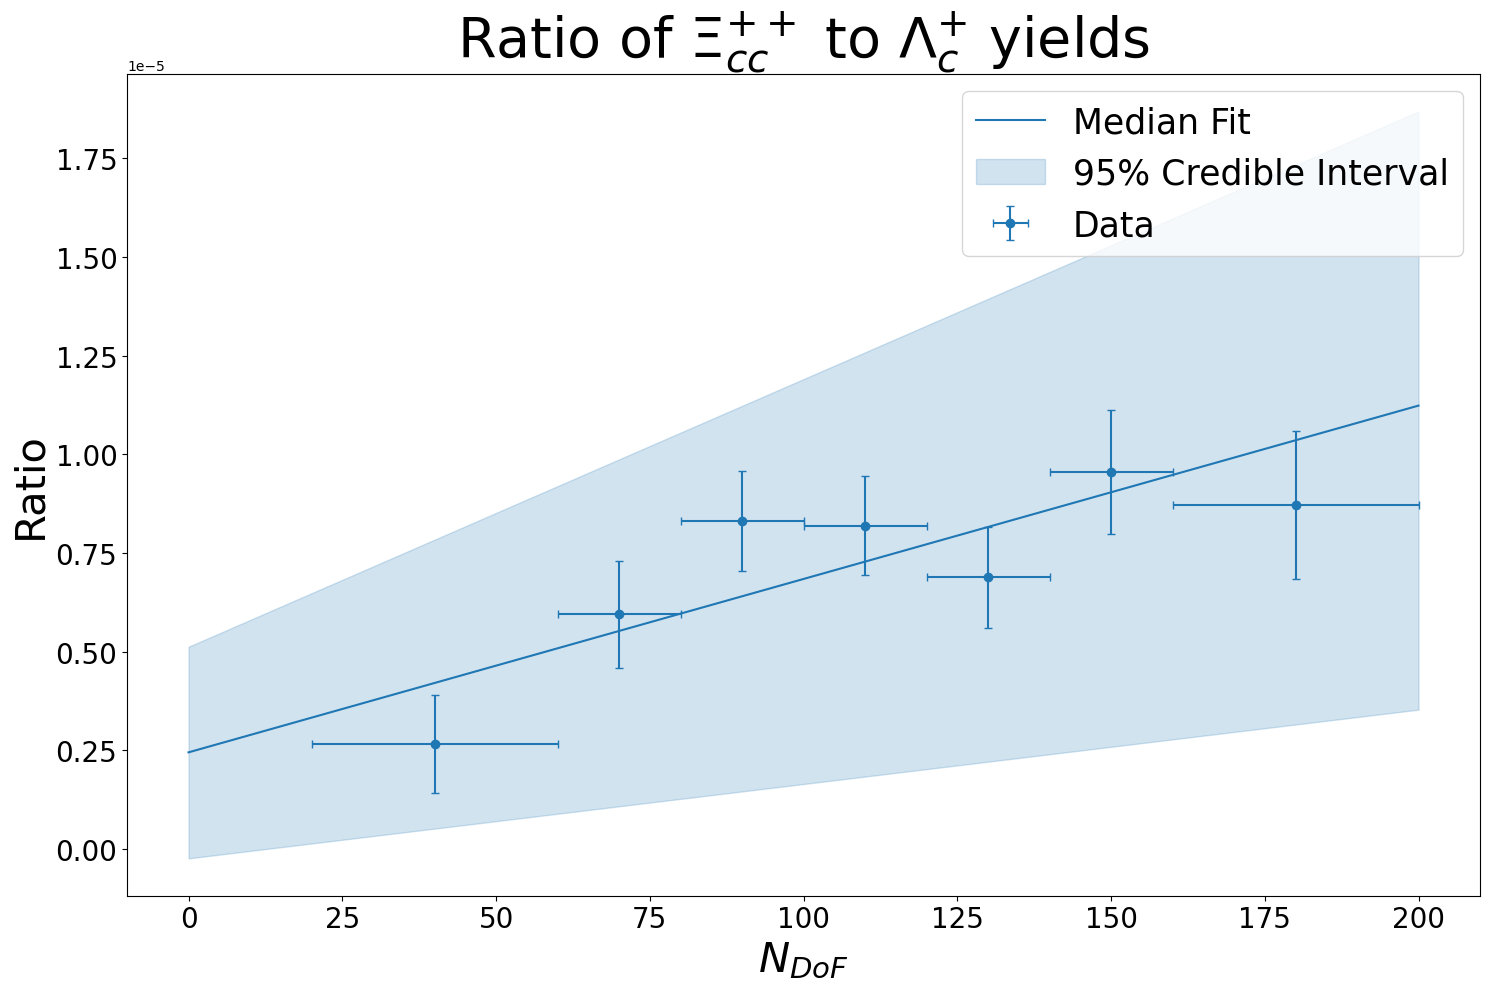

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming chain, xlim, dof_list, counts, x_err, ratio_err are defined

fig, axs = plt.subplots(figsize=(15, 10))
axs.errorbar(dof_list, counts, xerr=x_err, yerr=ratio_err, fmt='o', capsize=3, label="Data")

# Flatten the chain
flat_chain = chain.reshape(-1, chain.shape[-1])

# Calculate the median and the 95% credible interval for each parameter
median_m = np.median(flat_chain[:, 1])
lower_95_m = np.percentile(flat_chain[:, 1], 2.5)
upper_95_m = np.percentile(flat_chain[:, 1], 97.5)

median_b = np.median(flat_chain[:, 0])
lower_95_b = np.percentile(flat_chain[:, 0], 2.5)
upper_95_b = np.percentile(flat_chain[:, 0], 97.5)

# Plot the median line
axs.plot(xlim, median_m * xlim + median_b, "-", c="tab:blue", label="Median Fit")

# Plot the 95% credible interval region
axs.fill_between(xlim, 
                 lower_95_m * xlim + lower_95_b, 
                 upper_95_m * xlim + upper_95_b, 
                 color='tab:blue', alpha=0.2, label="95% Credible Interval")

axs.set_title('Ratio of $\Xi_{cc}^{++}$ to $\Lambda_{c}^{+}$ yields', fontsize=40)
axs.set_xlabel('$N_{DoF}$', fontsize=30)
axs.set_ylabel('Ratio', fontsize=30)
axs.tick_params(axis='both', which='major', labelsize=20)

axs.legend(fontsize=25)

plt.tight_layout()
plt.savefig('/home/bonacci/Results/Final_ratio.pdf')
plt.show()


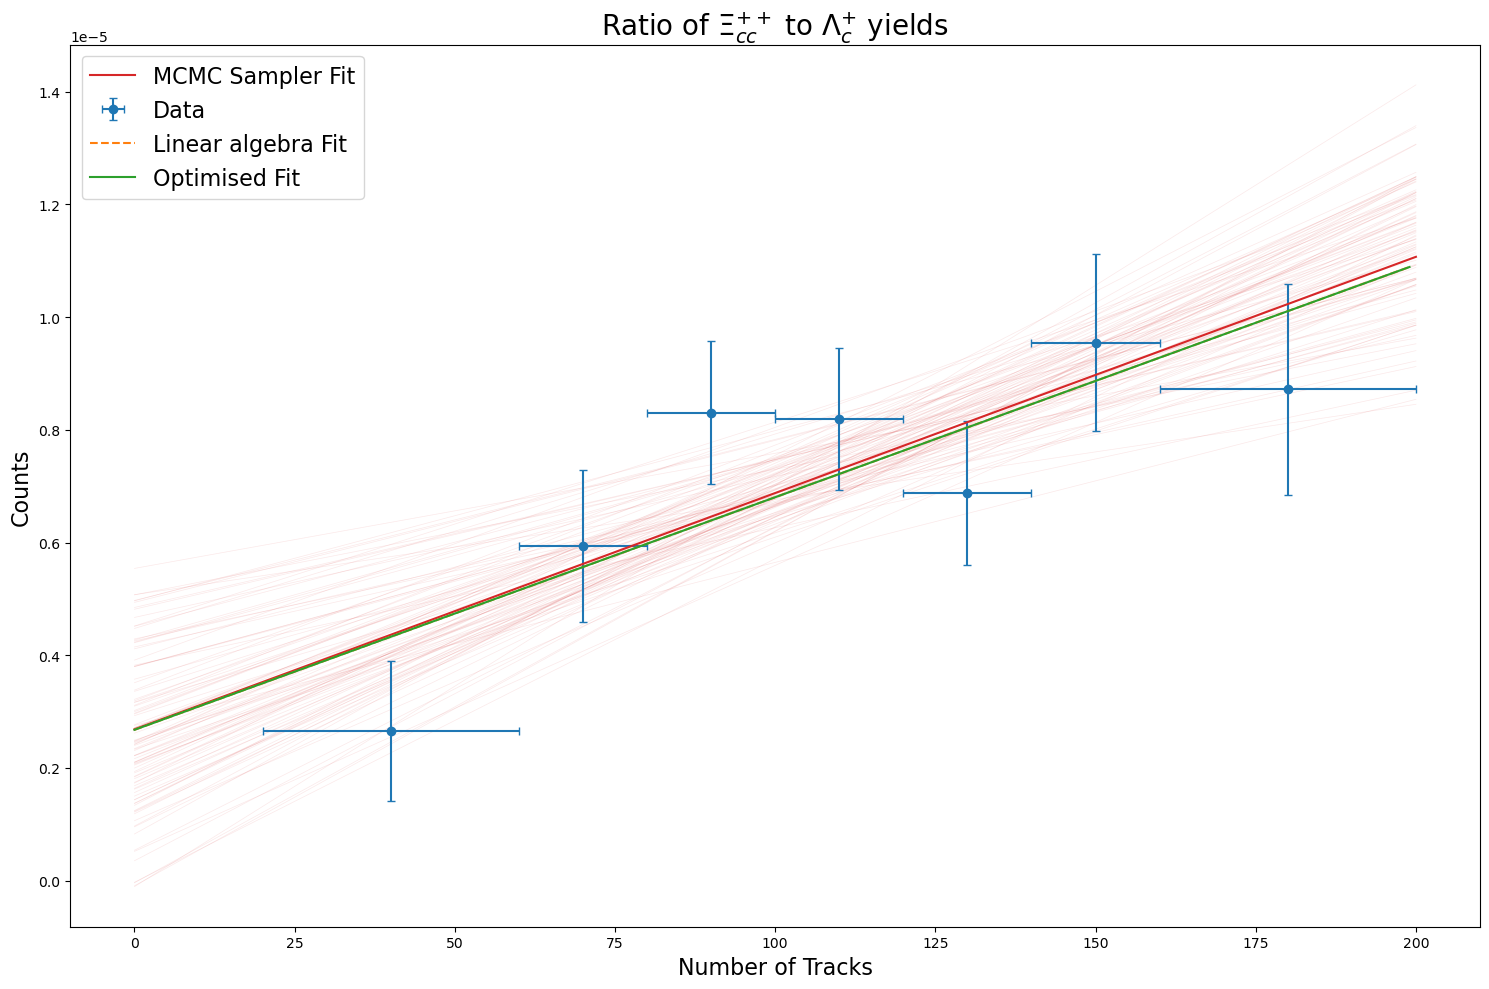

In [114]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(15, 10))
axs.errorbar(dof_list, counts, xerr=x_err, yerr=ratio_err, fmt='o', capsize=3, label="Data")
axs.errorbar(np.arange(0,200), X[1] * np.arange(0,200) + X[0], linestyle = '--', label="Linear algebra Fit")
axs.errorbar(np.arange(0,200), result.x[1] * np.arange(0,200) + result.x[0], label="Optimised Fit")

# Plot draws of the posterior.
for index in np.random.choice(chain.shape[0], size=100):
    b, m = chain[index][np.random.choice(1000)]
    axs.plot(
        xlim,
        m * xlim + b,
        "-",
        c="tab:red",
        alpha=0.1,
        lw=0.5,
        zorder=-1
    )


np.mean(chain[index], axis = 0)

axs.plot(
    xlim,
    np.mean(chain[4], axis = 0)[1] * xlim + np.mean(chain[4], axis = 0)[0],
    "-",
    c="tab:red",
    label = "MCMC Sampler Fit"
)


axs.set_title('Ratio of $\Xi_{cc}^{++}$ to $\Lambda_{c}^{+}$ yields', fontsize=20)
axs.set_xlabel('Number of Tracks', fontsize=16)
axs.set_ylabel('Counts', fontsize=16)

axs.legend(fontsize=16)

plt.tight_layout()
plt.show()

Ask why this is not like the thing in ratio in the paper

What is the ratio actually depicted above, the numerator term is simply the cross section of the $\Xi_{cc}^{++}$ only through our studied decay mode $\Xi_{\mathrm{cc}}^{++} \rightarrow \Lambda_{\mathrm{c}}^{+} K^{-} \pi^{+} \pi^{+}$, $\sigma_{\Xi_{cc}^{++}}$ * $BR(\Xi_{\mathrm{cc}}^{++} \rightarrow \Lambda_{\mathrm{c}}^{+} K^{-} \pi^{+} \pi^{+})$

$Ratio of yields = \frac{y_{\Xi_{cc}^{++}}}{y_{\Lambda_{c}^{+}}} = \frac{L * \sigma_{\Xi_{cc}^{++}}}{L * \sigma_{\Lambda_{c}^{+}}}$

This would suggest something initially about the production of the $\Xi_{cc}^{++}$ particles in that we see some sort of linear trend, suggesting an SPS+DPS process. 